># Spotify Musical Attributes and their relation to Well-Being, and the Prediction of Popular Music 
>### ST445, MT 2022

___________

## Table of Contents 

1. [Introduction](#introduction)
    * [Motivation](#motivation)
    * [Research Questions](#questions)
    * [Previous Work](#previous)
2. [Data Acquisition](#acquisition)
    * [Data Sources](#sources)
    * [Data Collection](#collection)
    * [Data Description](#description)
    * [Data Cleaning](#cleaning)
3. [Data Exploration](#exploration)
4. [Data Analysis](#analysis)
    * [Research Question 1](#q1)
    * [Research Question 2](#q2)
    * [Research Question 3](#q3)
5. [Discussion & Conclusion](#conclusion)
6. [References](#references)

______________

Loading all relevant libraries to be used in the report:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
from bs4 import BeautifulSoup
import requests
from matplotlib import rcParams
from tabulate import tabulate
import plotly.graph_objs as go
import random

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, confusion_matrix,accuracy_score,roc_curve, auc

## 1. Introduction <a class="anchor" id="introduction"></a>

### A. *Motivation* <a class="anchor" id="motivation"></a>

In this analysis, we sought to display and analyze the trends in musical attributes across different years and countries, described as “markets” going forward. Music plays a central role in many people’s lives through its ability to entertain and also its ability to impact mood and stress levels (Gray, 2022). Increased technology and the rise of modern music platforms allows individuals to be constantly connected to artists and their music. With this shift, music has become an even more central part of people’s lives and can be thought of as a reflection of the individual’s identity, mood, and well-being at any certain point in time. Using a quantified view of music, this analysis seeks to identify particular key attributes of popular music across years and countries and any potential shifts that may have occurred. 

Given that an individual’s musical listening habits can be interpreted as a reflection of their well-being, this analysis will compare trends in popular music to two additional views of the well-being of certain countries over certain years - GDP per country and their Happiness Index. Using a layered approach of musical and well-being data will provide additional insight into the way in which music can exist as a reflection of culture at a certain time and place. Finally, this analysis seeks to cluster songs based on their shared quantitative attributes and finally classifies songs as "Popular" vs "Not Popular" using these same attributes.

### B. *Research Questions* <a class="anchor" id="questions"></a>

**1.	How do the key attributes of music interact with one another and do there exist any relations between them?**

**2.	How have the key attributes of popular music shifted over time and how does this relate to the well-being of certain countries at those points in time?**

**3.	Can music be grouped based on shared quantitative attributes, to provide insight into shared attributes and how does this relate to the genre attribute? Based on these attributes, can a song be predicted to be Popular or Not Popular?**

### C. *Previous Work* <a class="anchor" id="previous"></a>

In order to contextualize our analysis, we will first provide an overview of the work that has been done on the topic and the ways in which our analysis will expand on previous work. 

The quantification of music as part of a music platform is not inherently unique to Spotify. For example, the Pandora Music Genome Project was first conceived in 1999, before Spotify’s founding, and mathematically groups and assigns attributes to songs based on their “genes” ("Music Genome Project"). This project informs the Pandora music platform, and forms the core of this company's technology. However, in the Pandora case, the information on attributes of particular songs is not publicly released ("Music Genome Project"). Spotify, on the other hand, does publicly release its song attribute data namely through its API, as utilized in this analysis. Besides this, Spotify even seems to encourage the use of their data via their Developer Showcase, featuring many different applications built by users using their API ("Developer Showcase"). Thus, the quantitative analysis of music is not inherently something new – but the open access approach taken by Spotify is one more recent. 

With this quantification of music, much analysis has been done leveraging the Spotify API and its musical attributes. Analyses such as “Faster, Louder, More Explicit: How Music Has Evolved Over the Years (and How My Own Musical Taste Compares)” is one of many examples where Spotify music data is used to reflect on musical attributes (Lin, 2020). Where our analysis differs though, is in connecting these attributes to greater global trends and sentiments. As claimed by Rentfrow et. al, “Music is multifaceted: it is composed of specific auditory properties, communicates emotions, and has strong social connotations” and it thus always part of a larger picture (Rentfrow et al., 2011). It is for this reason that the comparison between musical trends and other data, such as happiness and GDP, will provide us with valuable insight and expand on some of the previous analyses which tend to look at musical data in a much more siloed view.

Our final part of this analysis will seek to cluster songs by their various attributes and compare these clusters to the genres that the tracks are associated with. Spotify genre-assignments have been critiqued for lacking precision at the track level, and thus using some sort of clustering to align tracks with similar features alongside their assigned genres could provide insight ("Songs should show the type of genre it is"). The work by Al-Beitawi et. al. (2020) uses k-means clustering to identify groups of trending songs that share similar musical features, also leveraging Spotify data. Our analysis will similarly seek to cluster music based on their shared attributes, but also will extend beyond this to predict whether songs are popular or not based on their attributes.

## 2. Data Acquisition <a class="anchor" id="acquisition"></a>

### A. *Data Sources* <a class="anchor" id="sources"></a>

To perform our analysis and to answer the research questions above, we leveraged the extensive library of Spotify music as our primary data source.  Spotify, a major global music platform, has a free Web API which allows Spotify users to retrieve information from the Spotify platform about certain artists and tracks. (Hughes, 2015) The Spotify platform is well known for its interesting quantification of music and musical attributes. This can be seen through concepts such as “Wrapped”, where Spotify sends users a summary and analysis of all of their most-played music at the end of a calendar year. However, this quantification of music is also shown through the capabilities of the Web API. Using the “Get Track’s Audio Features” functionality of the API, end-users are able to obtain a wealth of information on a particular track – this information is further described in the Data Description section below.

In order to obtain data from the Spotify API, our group leveraged the API’s search endpoint which is described as being one of the more popular endpoints of the API given its ability to gather songs from a library of millions of songs and artists. (Hughes, 2015) While the search endpoint can be used for specific searches, looking for particular tracks or artists for example, our group chose to use it with a more general query, filtering solely by year and market, to obtain a list of songs to build our dataset. Spotify has claimed that search results and their ordering, particularly in the Spotify app and not solely within the API, are based on a multitude of factors. These factors include the current popularity of a track, its all-time popularity, but also a user’s personal listening history – this generally causes searches ordered towards the top of a search result to be those with more streams and artist followers. ("Spotify search ranking") Given Spotify’s somewhat vague explanations of their search results ordering, we cannot claim our dataset to be a random and representative sample of tracks across markets and years and thus it should not be interpreted as such. We can, however, claim that these results all suffered from a consistent level of selection bias inflicted by Spotify’s algorithm and knowing the context of the function provides us with confidence that the sample pulled from the API provides a valid sample for our analysis' use. 

As our additional view and proxy of well-being in the countries and years that our analysis covers, we leveraged information from the Wikipedia page on the World Happiness Report via web scraping. This website page provides a consolidated view of Happiness Scores and GDP per capita by country and year and thus provided a useful starting point for our analysis. 

### B. *Data Collection* <a class="anchor" id="collection"></a>

*Primary Data Source – Spotify Music*

To gather our Spotify music data, our group leveraged the Spotify Web API. API calls were performed in two separate Jupyter Notebooks (to be mindful of API rate limits), to be referenced for this part of the analysis. To access the Spotify API, one must login on the [Spotify Developer site](https://developer.spotify.com/dashboard/login) using their Spotify user credentials and then register an app to obtain a Client ID and Client Secret. Both of these keys are used for the Client Credentials Flow which provides server-to-server authentication ("Welcome to Spotipy!"). Our group added the Client ID and Client Secret to a ‘keys_personal.json’ file and draw from here when performing the authentication process. Note that data was obtained in early February and thus reflects song attributes and popularity scores reported by Spotify at that point in time.

First, our group used the ‘1_API_Track_Data_Load.ipynb’ notebook to obtain the musical tracks and ID’s used in the analysis. Following the client credentials flow, tracks were gathered across the years 2015-2022 and across the US, UK, India and Netherlands markets. We chose this range of years to ensure we gathered enough data surrounding the COVID-19 time period given that this possibly skewed music listening behavior. Additionally, we chose these markets given our group's interest in these particular key areas of the world. Spotipy, a Python library used to access the Spotify API, has a Search function which was leveraged to obtain songs from these particular years and markets ("Welcome to Spotipy!"). Note, some limitations of the process included that the search function allowed for a maximum of 50 results per query hence requiring a for-loop which only passes in 50 requests at once. Additionally, if a song is performed by multiple artists our code pulls only the first listed artist into the dataframe to ensure that tracks are associated with only one unique artist ID and to avoid duplication. Following this process, our group iterated over the dataframe and used the Spotipy Artist function to obtain the genres associated with the artist associated with the tracks ("Welcome to Spotipy!"). Note, that the reasoning for obtaining genres at the artist level is due to Spotify’s lack of genre-information at the track level. Following this process, genre and track information were merged into one dataframe and duplicates were removed before loading the dataframe into CSV format. Please refer to the ‘1_API_Track_Data_Load.ipynb’ notebook for additional details.

Following this first step, our group leveraged the previously created CSV file obtaining track and artist information in the “2_API_TrackFeatures_Data_Load.ipynb” notebook. In this notebook, we sought to gather the musical attribute data for each of the collected tracks and merge them into the dataframe provided via the CSV file. Within this file, the Spotipy Audio Features function was leveraged to obtain all of the features data (discussed in more detail in the Data Description section) for the track ID’s provided in the data ("Welcome to Spotipy!"). One limitation of the function is that it allows for a maximum of 100 tracks being passed in during each run. It is for this reason that our code leverages a batching method, with only 100 track ID’s being passed in during each iteration. These features were de-duplicated and merged into the dataframe containing all track information (track name, artist, genre, etc.)  to produce one final dataframe written to a final CSV file named “spotify_tracks_feats.csv”. It is this CSV file that will be leveraged as the primary data source in the remainder of this analysis, and it is this file that should be used during any re-runs of this analysis given that repeating the API process on a different date could lead to different results.

In [2]:
#loading in spotify data csv file
df = pd.read_csv('spotify_tracks_feats.csv')

#view of first 15 columns of dataset
df.head()

,year,market,artist_name,artist_id,track_name,track_id,popularity,artist_genre,danceability,energy,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,2022,US,SZA,7tYKF4w9nC0nq9CsPZTHyP,Kill Bill,3OHfY25tqY28d16oZczHc8,93,"['pop', 'r&b']",0.644,0.728,...,0.169,0.1610,0.430,88.993,audio_features,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4
1,2022,IN,SZA,7tYKF4w9nC0nq9CsPZTHyP,Kill Bill,3OHfY25tqY28d16oZczHc8,93,"['pop', 'r&b']",0.644,0.728,...,0.169,0.1610,0.430,88.993,audio_features,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4
2,2022,NL,SZA,7tYKF4w9nC0nq9CsPZTHyP,Kill Bill,3OHfY25tqY28d16oZczHc8,93,"['pop', 'r&b']",0.644,0.728,...,0.169,0.1610,0.430,88.993,audio_features,spotify:track:3OHfY25tqY28d16oZczHc8,https://api.spotify.com/v1/tracks/3OHfY25tqY28...,https://api.spotify.com/v1/audio-analysis/3OHf...,153947,4
3,2022,US,Metro Boomin,0iEtIxbK0KxaSlF7G42ZOp,Creepin' (with The Weeknd & 21 Savage),2dHHgzDwk4BJdRwy9uXhTO,94,['rap'],0.715,0.620,...,0.000,0.0822,0.172,97.950,audio_features,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,https://api.spotify.com/v1/tracks/2dHHgzDwk4BJ...,https://api.spotify.com/v1/audio-analysis/2dHH...,221520,4
4,2022,GB,Metro Boomin,0iEtIxbK0KxaSlF7G42ZOp,Creepin' (with The Weeknd & 21 Savage),2dHHgzDwk4BJdRwy9uXhTO,94,['rap'],0.715,0.620,...,0.000,0.0822,0.172,97.950,audio_features,spotify:track:2dHHgzDwk4BJdRwy9uXhTO,https://api.spotify.com/v1/tracks/2dHHgzDwk4BJ...,https://api.spotify.com/v1/audio-analysis/2dHH...,221520,4


*Secondary Data Source – World Happiness Report*

In order to obtain the happiness index and GDP per capita of the various markets that we are interested in analyzing we took a look at the Happiness Report available on the [Wikipedia Page](https://en.wikipedia.org/wiki/World_Happiness_Report) for the years 2016-20. We leverage the web scraping capabilities of BeautifulSoup to get the Score and GDP per capita for the specified years. We create one for loop over the years 2018, 2019, and 2020 as the structure of obtaining happiness scores and GDP per capita of various markets is similar as they are present in the same table cell while we create a different for loop for 2016 and 2017 as the metrics that we are interested in scraping are present in different table cells for these years. Finally, we create two dataframes for storing the happiness score and GDP Per Capita for 2016-20 over different markets. Note that the years 2015 and 2021-2022 were purposefully excluded from this process given that they are not covered on this Wikipedia page.

See below for the web scraping process, drawing out the GDP and Happiness Index for each of our relevant countries and years.

In [3]:
#initializing the webscraping process and leveraging the Beautiful Soup library
url='https://en.wikipedia.org/wiki/World_Happiness_Report#International_rankings'
r=requests.get(url)
soup=BeautifulSoup(r.content,'lxml')

NL=[]
US=[]
UK=[]
IN=[]

GDP_NL = []
GDP_US = []
GDP_UK = []
GDP_IN = []

In [4]:
#gathering data for 2020,2019,2018
for i in range(1,4):
    
    table=soup.find_all('table',attrs={'class':'wikitable sortable'})[i]
    n=len(table.find_all('td'))
    
    Country=[]
    Score=[]
    GDP_Per_Capita=[]
    Happiness_Score={}    
    
    for j in range(0,n,9):
        Country.append(table.find_all('td')[j+1].get_text()[1:].strip())
        Score.append(table.find_all('td')[j+2].get_text().strip())
        GDP_Per_Capita.append(table.find_all('td')[j+3].get_text().strip())
        df_info =pd.DataFrame(list(zip(Country,Score,GDP_Per_Capita)),columns=['Country Name','Score','GDP_Per_Capita'])
        
    NL.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['Score'].values[0])
    UK.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['Score'].values[1])
    US.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['Score'].values[2])
    IN.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['Score'].values[3])

    GDP_NL.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['GDP_Per_Capita'].values[0])
    GDP_UK.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['GDP_Per_Capita'].values[1])
    GDP_US.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['GDP_Per_Capita'].values[2])
    GDP_IN.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['GDP_Per_Capita'].values[3])

In [5]:
#gathering data for 2017
table=soup.find_all('table',attrs={'class':'wikitable sortable'})[4]
n=len(table.find_all('td'))

Country=[]
Score=[]
GDP_Per_Capita=[]
Happiness_Score={}    

for j in range(0,n,12):
    Country.append(table.find_all('td')[j+2].get_text()[1:].strip())
    Score.append(table.find_all('td')[j+3].get_text().strip())
    GDP_Per_Capita.append(table.find_all('td')[j+5].get_text().strip())
    df_info=pd.DataFrame(list(zip(Country,Score,GDP_Per_Capita)),columns=['Country Name','Score','GDP_Per_Capita'])

NL.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['Score'].values[0])
US.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['Score'].values[1])
UK.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['Score'].values[2])
IN.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['Score'].values[3])

GDP_NL.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['GDP_Per_Capita'].values[0])
GDP_US.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['GDP_Per_Capita'].values[1])
GDP_UK.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['GDP_Per_Capita'].values[2])
GDP_IN.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['GDP_Per_Capita'].values[3])

In [6]:
#gathering data for 2016
table=soup.find_all('table',attrs={'class':'wikitable sortable'})[5]
n=len(table.find_all('td'))

Country=[]
Score=[]
GDP_Per_Capita=[]
Happiness_Score={}    

for j in range(0,n,10):
    Country.append(table.find_all('td')[j+1].get_text()[1:].strip())
    Score.append(table.find_all('td')[j+2].get_text().strip())
    GDP_Per_Capita.append(table.find_all('td')[j+4]['data-sort-value'])
    df_info=pd.DataFrame(list(zip(Country,Score,GDP_Per_Capita)),columns=['Country Name','Score','GDP_Per_Capita'])

NL.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['Score'].values[0])
US.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['Score'].values[1])
UK.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['Score'].values[2])
IN.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['Score'].values[3])

GDP_NL.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['GDP_Per_Capita'].values[0])
GDP_US.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['GDP_Per_Capita'].values[1])
GDP_UK.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['GDP_Per_Capita'].values[2])
GDP_IN.append(df_info[(df_info['Country Name']=='Netherlands')|(df_info['Country Name']=='United States')|(df_info['Country Name']=='United States of America')|(df_info['Country Name']=='India')|(df_info['Country Name']=='United Kingdom')]['GDP_Per_Capita'].values[3])

In [7]:
#creating the Happiness Index Dataframe
Countries=['GB','IN','NL','US']
Happiness_DF=pd.DataFrame(list(zip(UK,IN,NL,US)),columns=['GB','IN','NL','US'],
             index=['2020','2019','2018','2017','2016'])
Happiness_DF=Happiness_DF.transpose()
Happiness_DF.reset_index(inplace=True)
Happiness_DF['2020'] = Happiness_DF['2020'].astype(float)
Happiness_DF['2019'] = Happiness_DF['2019'].astype(float)
Happiness_DF['2018'] = Happiness_DF['2018'].astype(float)
Happiness_DF['2017'] = Happiness_DF['2017'].astype(float)
Happiness_DF['2016'] = Happiness_DF['2016'].astype(float)
Happiness_DF.rename(columns={'index':'Country Name'},inplace=True)
Happiness_DF = Happiness_DF.transpose()
Happiness_DF.columns = ['GB','IN','NL','US']
Happiness_DF = Happiness_DF[1::]
Happiness_DF = Happiness_DF[::-1]
Happiness_DF

,GB,IN,NL,US
2016,6.725,4.404,7.339,7.104
2017,6.714,4.315,7.377,6.993
2018,7.19,4.19,7.441,6.886
2019,7.054,4.015,7.488,6.892
2020,7.165,3.573,7.449,6.94


In [8]:
#creating the GDP Dataframe
GDP_DF=pd.DataFrame(list(zip(GDP_UK, GDP_IN, GDP_NL,GDP_US)),columns=['GB','IN','NL','US'],
             index=['2020','2019','2018','2017','2016'])
GDP_DF=GDP_DF.transpose()
GDP_DF.reset_index(inplace=True)
GDP_DF.rename(columns={'index':'Country Name'},inplace=True)
GDP_DF['2020'] = GDP_DF['2020'].astype(float)
GDP_DF['2019'] = GDP_DF['2019'].astype(float)
GDP_DF['2018'] = GDP_DF['2018'].astype(float)
GDP_DF['2017'] = GDP_DF['2017'].astype(float)
GDP_DF['2016'] = GDP_DF['2016'].astype(float).round(3)
GDP_DF = GDP_DF.transpose()
GDP_DF.columns = ['GB','IN','NL','US']
GDP_DF = GDP_DF[1::]
GDP_DF = GDP_DF[::-1]
GDP_DF

,GB,IN,NL,US
2016,1.403,0.74,1.465,1.508
2017,1.442,0.792,1.504,1.546
2018,1.244,0.721,1.361,1.398
2019,1.333,0.755,1.396,1.433
2020,1.273,0.731,1.339,1.374


### C. *Data Description* <a class="anchor" id="description"></a>

The data obtained via the Spotify API reports musical tracks and their associated information. This information includes artist information such as ID’s and genres, but also includes particular metrics which must be defined prior to the analysis of the data, defined below and following the documentation ("Get Track's Audio Features"):

-	Popularity: Described by Spotify as a value between 0-100, with 100 being the most popular, this is calculated by a Spotify algorithm and “is based, in the most part, on the total number of plays the track has and how recent those plays are” ("Search for Item").
    - Spotify also notes that songs that are played more often currently, thus at the time of our initial data retrieval, will generally have a higher popularity score than songs that were played frequently in the past. This is important to note for the time-based aspect of our analysis as the popularity scores reflected in the data frame only represent popularity at one particular moment in time.
-	Acousticness: Defined by Spotify as a “A confidence measure from 0-1 of whether the track is acoustic,” thus not an objective measure but rather one based on inference.
-	Danceability: Defined by Spotify as “..how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.” The minimum value of 0 denotes least danceable and 1 denotes most danceable.
-	Duration: The duration of a particular track, calculated in milliseconds.
-	Energy: Defined by Spotify as “..a perceptual measure of intensity and activity.” The metric ranges from 0-1, with the perceptual features contributing to the score including “dynamic range, perceived loudness, timbre, onset rate, and general entropy.” 
-	Instrumentalness: A prediction made by Spotify as to whether the track contains vocals or not, with “oohs” and “aahs” being treated as instrumental. As the value approaches 1, the Spotify algorithm has greater confidence that the track contains no vocals. 
-	Key: The key of a particular song, with integers mapping to pitches via pitch class notation and thus being categorical. Note that if no key was detected, the value of the key is denoted as “-1”.  
-	Liveness: Spotify states that this measure “detects the presence of an audience in the recording”, where a higher value represents an increased probability that a live audience was detected.
-	Loudness: measured in decibels, the overall loudness of the track as averaged over the entire track. Values typically range from -60 – 0. 
-	Mode: A categorical variable, 1 denotes major mode and 0 represents minor mode. 
-	Speechiness: This measure “detects the presence of spoken words in a track” with the higher the value the more speech-based the track is. 
-	Tempo:  Measured in beats-per-minute (BPM), defined as the overall estimated tempo of a track. 
-	Time signature: An integer based value denoting the number of beats in a bar, with the integer ranging from 3-7 and being placed over 4 (resulting in a range of “3/4” – “7/4”).  
-	Valence: Defined by Spotify as the “musical positiveness conveyed by a track”. Tracks with a higher score, up to 1, are assumed to sound more positive and happy while tracks with a lower score, down to 0, are more negative and sad or angry.

Additionally, to ensure common knowledge of the terms scraped from the World Happiness Report we define the metrics:

- Happiness Score: Based on a poll that is employed across the world by Gallup, where "nationally representative samples of respondents are asked to think of a ladder, with the best possible life for them being a 10, and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale" ("World Happiness Report").
- GDP per Capita: Drawn from the Gallup World Poll, "this reveals a populated-weighted average score on a scale running from 0 to 10 that is tracked over time and compared against other countries"("World Happiness Report"). GDP per capita is defined as a country's economic output per person, and is a measure for "gauging the prosperity of nations" ("GDP per Capita Defined").

### D. *Data Cleaning* <a class="anchor" id="cleaning"></a>

To prepare our data for the analysis portion of this report,  some data cleaning steps were taken. 

For the Spotify data set, some initial necessary data cleaning steps were completed in the respective API data load notebooks - namely the removal of duplicates from the dataframe and merging the relevant dataframes. 

Below, additional steps are taken in order to ensure that the dataframe leveraged for the analysis is one that is intuitive and representative of the data we are hoping to present in our analysis - namely updating the data types of our columns where necessary and removing some unnecessary columns.

In [9]:
#looking at datatypes of all Spotify df columns
df.dtypes

year                  int64
market               object
artist_name          object
artist_id            object
track_name           object
track_id             object
popularity            int64
artist_genre         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
dtype: object

In [10]:
#resetting data types of columns where necessary
df['year'] = df['year'].astype('category')
df['market'] = df['market'].astype('category')
df['key'] = df['key'].astype('category')
df['mode'] = df['mode'].astype('category')
df['time_signature'] = df['time_signature'].astype('category')
df.columns

Index(['year', 'market', 'artist_name', 'artist_id', 'track_name', 'track_id',
       'popularity', 'artist_genre', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'uri', 'track_href',
       'analysis_url', 'duration_ms', 'time_signature'],
      dtype='object')

In [11]:
#dropping those columns that are not needed or useful for our analysis 
df.drop(['artist_id','track_id','type','uri','track_href','analysis_url'],axis=1,inplace=True)
df.head()

,year,market,artist_name,track_name,popularity,artist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,2022,US,SZA,Kill Bill,93,"['pop', 'r&b']",0.644,0.728,8,-5.750,1,0.0351,0.0543,0.169,0.1610,0.430,88.993,153947,4
1,2022,IN,SZA,Kill Bill,93,"['pop', 'r&b']",0.644,0.728,8,-5.750,1,0.0351,0.0543,0.169,0.1610,0.430,88.993,153947,4
2,2022,NL,SZA,Kill Bill,93,"['pop', 'r&b']",0.644,0.728,8,-5.750,1,0.0351,0.0543,0.169,0.1610,0.430,88.993,153947,4
3,2022,US,Metro Boomin,Creepin' (with The Weeknd & 21 Savage),94,['rap'],0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000,0.0822,0.172,97.950,221520,4
4,2022,GB,Metro Boomin,Creepin' (with The Weeknd & 21 Savage),94,['rap'],0.715,0.620,1,-6.005,0,0.0484,0.4170,0.000,0.0822,0.172,97.950,221520,4


## 3. Data Exploration <a class="anchor" id="exploration"></a>

Next, performing some initial data exploration on the Spotify dataset to ensure we have a proper understanding of the data that we are working with for the remainder of the analysis. The descriptive statistics below provide an initial view of the distribution of the data points included in the analysis.

In [12]:
df.describe(include='all')

,year,market,artist_name,track_name,popularity,artist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,9380.0,9380,9380,9380,9380.000000,9380,9380.000000,9380.000000,9380.0,9380.000000,9380.0,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9380.000000,9.380000e+03,9380.0
unique,8.0,4,2390,6153,NaN,1347,NaN,NaN,12.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
top,2015.0,IN,Taylor Swift,Falling,NaN,['pop'],NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
freq,1189.0,2363,152,10,NaN,364,NaN,NaN,1055.0,NaN,5296.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8485.0
mean,NaN,NaN,NaN,NaN,67.293710,NaN,0.643992,0.609014,NaN,-7.138759,NaN,0.108266,0.300161,0.034555,0.171836,0.471686,119.638420,2.074155e+05,NaN
std,NaN,NaN,NaN,NaN,10.331347,NaN,0.154610,0.190707,NaN,3.279614,NaN,0.108242,0.279675,0.145199,0.128198,0.227809,29.700831,9.140844e+04,NaN
min,NaN,NaN,NaN,NaN,38.000000,NaN,0.000000,0.000020,NaN,-42.530000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.200000e+04,NaN
25%,NaN,NaN,NaN,NaN,60.000000,NaN,0.548000,0.485000,NaN,-8.439000,NaN,0.038300,0.056100,0.000000,0.097875,0.294000,97.002750,1.739682e+05,NaN
50%,NaN,NaN,NaN,NaN,69.000000,NaN,0.658000,0.622000,NaN,-6.554000,NaN,0.058650,0.208000,0.000001,0.121000,0.459000,118.991000,2.024155e+05,NaN
75%,NaN,NaN,NaN,NaN,75.000000,NaN,0.756000,0.748000,NaN,-5.115000,NaN,0.133000,0.495000,0.000158,0.199000,0.643000,139.972000,2.321298e+05,NaN


As we can see based on the above descriptive statistics, those metrics which we know to be quantitative record a range of values that generally align with the range mentioned for each metric in the data description above. Two aspects that must be noted coming out of these descriptive statistics:

- Popularity: The range of values for popularity range between 38-94 as seen by the minimum and maximum values in the table. While we know that the popularity score truthfully can range from 0-100 based on Spotify documentation, this tells us that no songs with popularity scores in the lower 25% of possible popularity scores exist in our dataframe. This is something that should be noted for any analysis of the metric going forward.
- Loudness: Spotify documentation stated that the loudness score for tracks typically ranges between -60 and 0 db, though we note that the descriptive statistics claim the maximum loudness value to be about 1.63. (2) Below, we look particularly at the rows where this seems to be the case and note that one song satisfies this condition. Based on this, we make the assumption that Spotify purposefully assigned this song a loudness value greater than "0" given its unique loudness which goes beyond the "typical" values for the metric.

In [13]:
df[df['loudness'] > 0.0]

,year,market,artist_name,track_name,popularity,artist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
6639,2017,GB,Macky Gee,Tour,59,"['bass house', 'tekk']",0.584,0.993,5,1.634,0,0.0527,0.456,0.688,0.129,0.36,175.082,289371,4


- Duration: Additionally, based on the descriptive statistics we note that the maximum duration of songs far exceeds that of the 75% percentile. After some additional exploration seen below, it seems as though there exist only three rows where the duration of the song exceeds $3.3$x$10^6$ which corresonds to about 55 minutes long. Based on contextual knowledge, we know this to be much longer than any average song would be and thus these must be compilations of songs instead. Additionally, looking at the maximum duration if one were to exclude songs with duration greater or equal to 55 minutes would be $6.7$x$10^5$ which corresponds to 11 minutes and seems far more reasonable. Thus, our group made the decision to drop those 3 outlier rows with durations greater than 55 minutes from the dataset.

In [14]:
#rows of songs with durations greater than 55 minutes
df[df['duration_ms'] > 3300000]

,year,market,artist_name,track_name,popularity,artist_genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
5564,2018,IN,Arya Acharya,52 Non Stop Dilbar Dilbar Remix(Remix By Kedro...,59,[],0.521,0.837,7,-4.501,1,0.0794,0.0593,0.000013,0.1570,0.480,106.001,4581483,4
6826,2017,IN,Aarsh Benipal,High Rated Gabru 52 Non Stop Hits(Remix By Man...,52,['punjabi pop'],0.385,0.935,2,-2.545,1,0.2590,0.0843,0.000000,0.6780,0.557,180.793,4676058,4
7959,2016,IN,Anuradha Paudwal,Om Bhurbhuwasah,53,"['bhajan', 'classic bollywood', 'desi pop', 'f...",0.719,0.466,3,-9.153,1,0.0417,0.7330,0.000002,0.0973,0.812,137.159,3340672,4


In [15]:
#maximum duration excluding songs greater than 55 minutes long
df[df['duration_ms'] < 3300000]['duration_ms'].max()

667707

In [16]:
#dropping those rows with duration greater than 55 minutes
df.drop(df[df['duration_ms'] > 3300000].index, inplace=True)

Next, visualising the distribution of quantitative values in our dataset by years. We used a KDE plot to visualise those values which are continuous while we used a histogram to visualise those values that are categorical, with this distinction being mainly to enhance the interpretation that can be gleaned from the plots. 

From the plots below, we can state the following insights:
- Distributions of the values of continuous variables seem to hold relatively even when comparing across years. 
- For the categorical 'key' value, there is one key (value 3 - associated with D-sharp or E-flat) that is far less common across all years. 

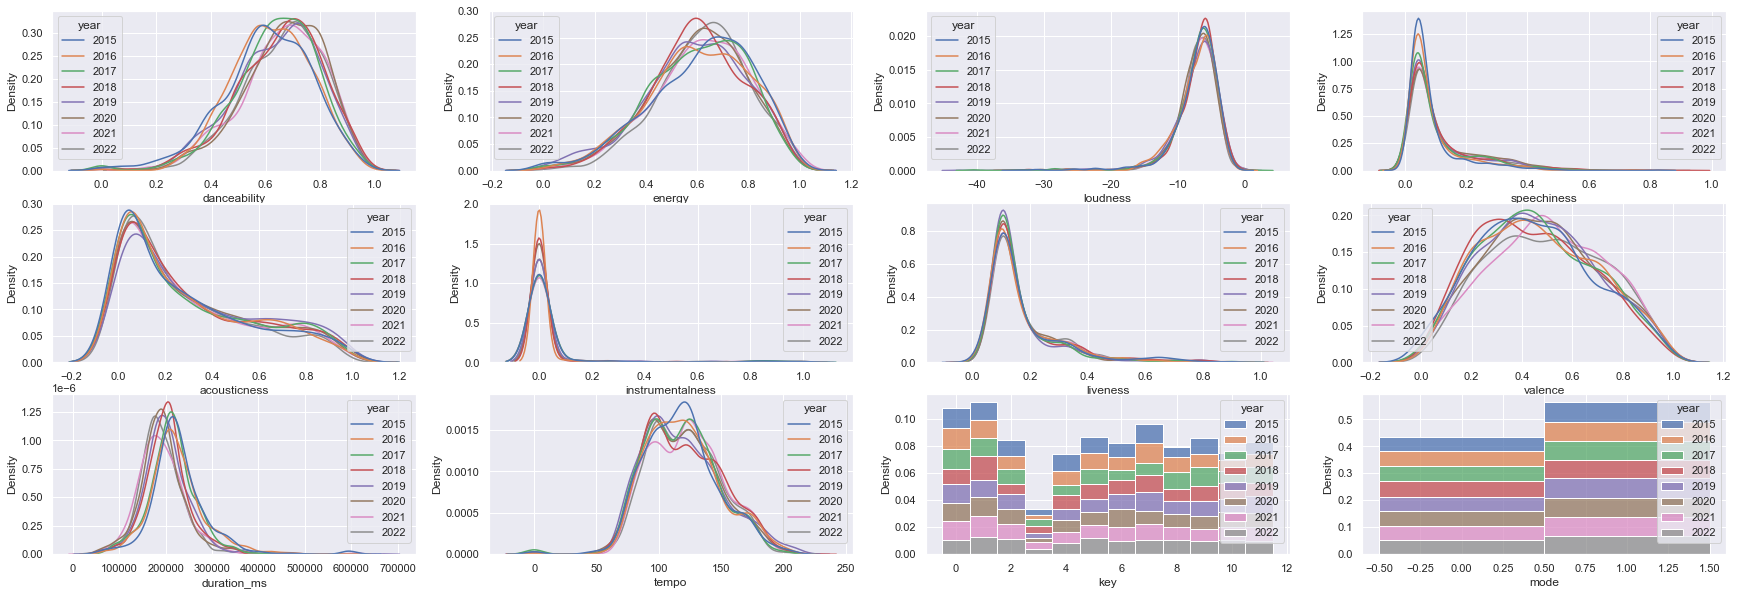

In [17]:
fig, ax = plt.subplots(3, 4, figsize=(30, 10))
sns.kdeplot(data=df, x='danceability', hue='year', ax=ax[0,0]);
sns.kdeplot(data=df, x='energy', hue='year', ax=ax[0,1]);
sns.kdeplot(data=df, x='loudness', hue='year', ax=ax[0,2]);
sns.kdeplot(data=df, x='speechiness', hue='year', ax=ax[0,3]);

sns.kdeplot(data=df, x='acousticness', hue='year', ax=ax[1,0]);
sns.kdeplot(data=df, x='instrumentalness', hue='year', ax=ax[1,1]);
sns.kdeplot(data=df, x='liveness', hue='year', ax=ax[1,2]);
sns.kdeplot(data=df, x='valence', hue='year', ax=ax[1,3]);

sns.kdeplot(data=df, x='duration_ms', hue='year', ax=ax[2,0]);
sns.kdeplot(data=df, x='tempo', hue='year', ax=ax[2,1]);
sns.histplot(data=df, x='key', hue='year', ax=ax[2,2], stat='density', multiple='stack');
sns.histplot(data=df, x='mode', hue='year', ax=ax[2,3], stat='density', multiple='stack');

Next, visualising the distribution of quantitative values in our dataset by markets. Once again, we used a KDE plot to visualise those values which are continuous while we used a histogram to visualise those values that are categorical. 

From the plots below, we can state the following insights:
- The distributions of the values of continuous variables still seem to hold relatively even when comparing across the markets though India seems to differ most significantly from the others.

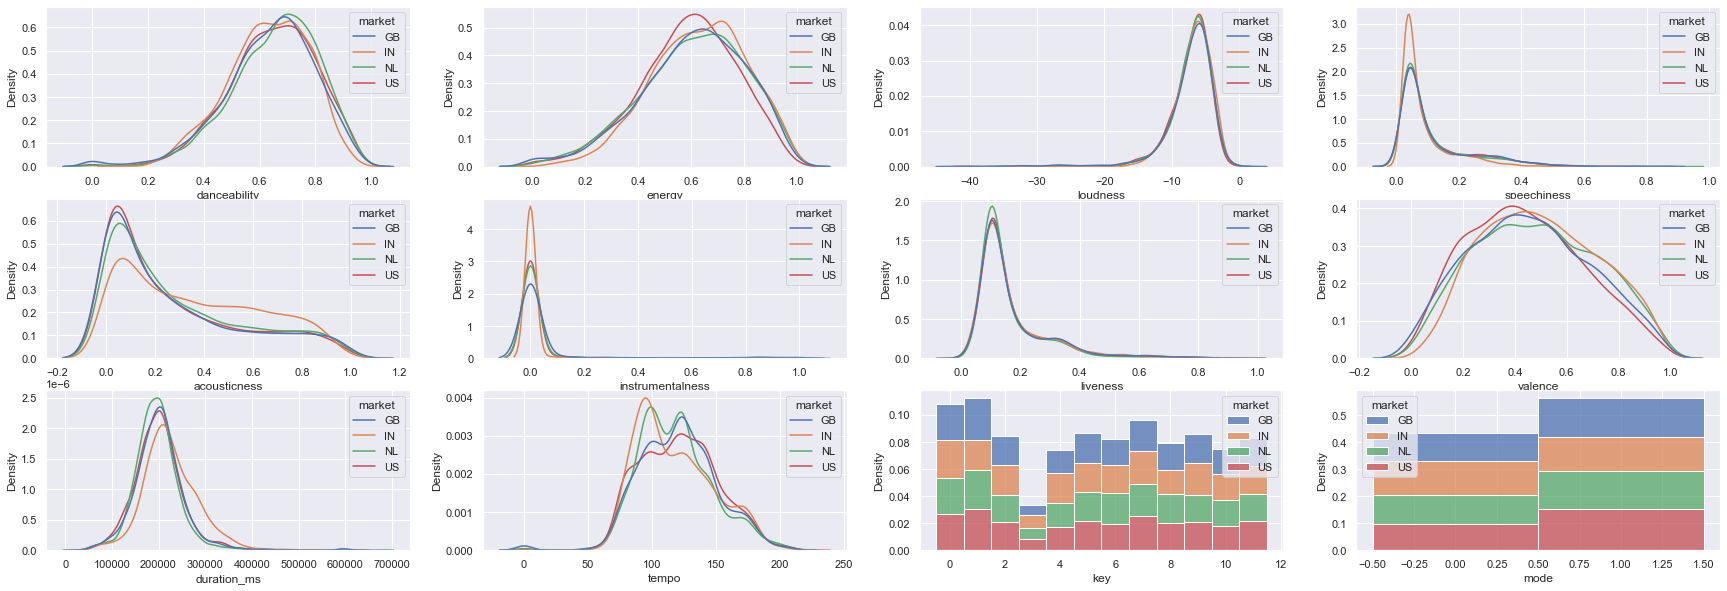

In [18]:
fig, ax = plt.subplots(3, 4, figsize=(30, 10))
sns.kdeplot(data=df, x='danceability', hue='market', ax=ax[0,0]);
sns.kdeplot(data=df, x='energy', hue='market', ax=ax[0,1]);
sns.kdeplot(data=df, x='loudness', hue='market', ax=ax[0,2]);
sns.kdeplot(data=df, x='speechiness', hue='market', ax=ax[0,3]);

sns.kdeplot(data=df, x='acousticness', hue='market', ax=ax[1,0]);
sns.kdeplot(data=df, x='instrumentalness', hue='market', ax=ax[1,1]);
sns.kdeplot(data=df, x='liveness', hue='market', ax=ax[1,2]);
sns.kdeplot(data=df, x='valence', hue='market', ax=ax[1,3]);

sns.kdeplot(data=df, x='duration_ms', hue='market', ax=ax[2,0]);
sns.kdeplot(data=df, x='tempo', hue='market', ax=ax[2,1]);
sns.histplot(data=df, x='key', hue='market', ax=ax[2,2], stat='density', multiple='stack');
sns.histplot(data=df, x='mode', hue='market', ax=ax[2,3], stat='density', multiple='stack');

Finally, we leveraged two line plots to visualize the distribution of GDP Per Capita and Happiness Index by country as web scraped from the Wikipedia World Happiness Report page. We chose to use a line plot for this visualization to show the change in these values from year to year. 

Some initial insights we can derive from these plots:
- Overall, it seems as though India scores below the other countries in terms of both GDP per Capita and Happiness Index year over year. 
- For the Happiness Index, as of 2018 the GB (Great Britain) and US lines cross over each other, and Great Britain consistently ranks slightly above the US following this. 
- The US consistently ranks as the highest in terms of GDP per Capita year over year, while the Netherlands consistenly ranks above the other countries in terms of the Happiness Index.

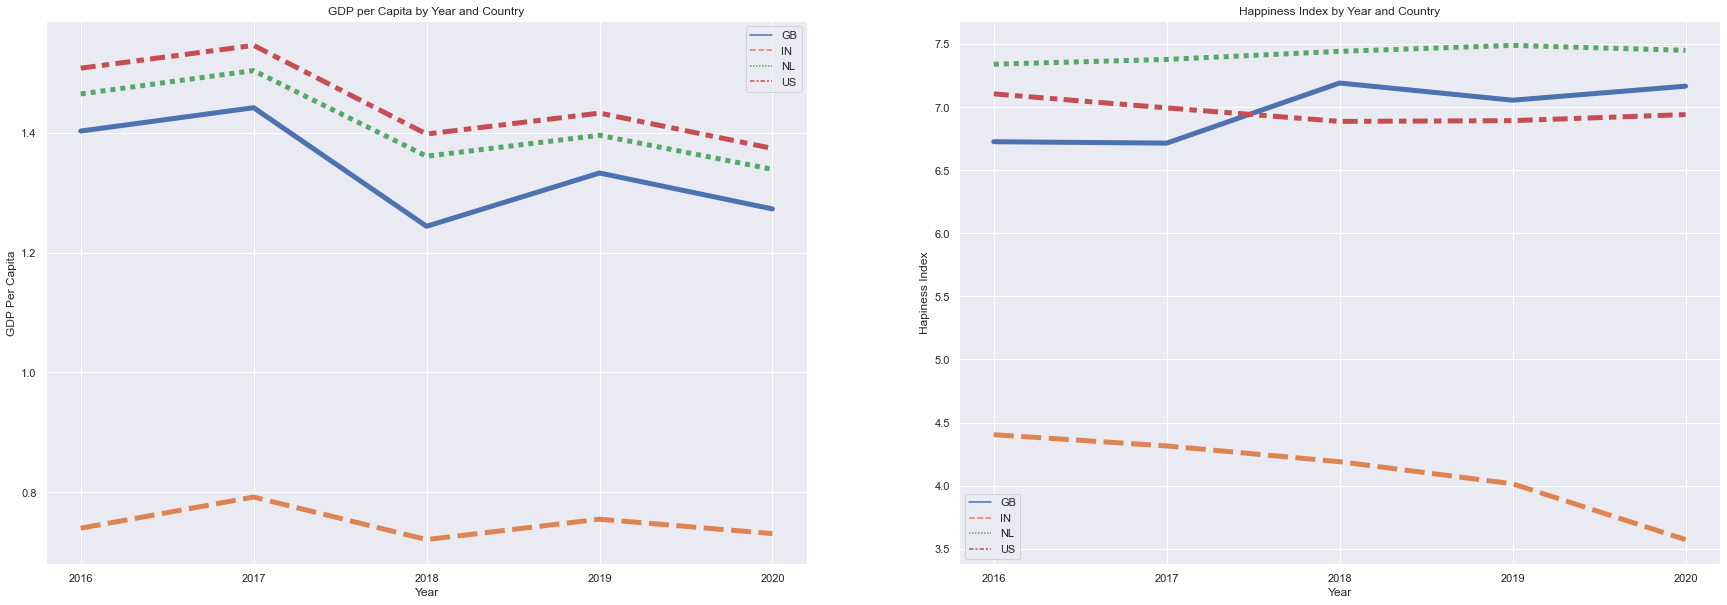

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(30, 10))
sns.lineplot(data=GDP_DF, ax=ax[0],linewidth=5).set(title='GDP per Capita by Year and Country');
sns.lineplot(data=Happiness_DF, ax=ax[1], linewidth=5).set(title='Happiness Index by Year and Country');
ax[0].set(xlabel='Year', ylabel='GDP Per Capita')
ax[1].set(xlabel='Year', ylabel='Hapiness Index');

## 4. Data Analysis <a class="anchor" id="analysis"></a>

### A. *Research Question 1: How do the key attributes of music interact with one another and do there exist any relations between them?* <a class="anchor" id="q1"></a>

In order to assess the relations between the attributes and popularity of music in the Spotify dataframe, we first chose to leverage a pair plot which visualises the scatter plots between all continuous variables. Given the quantity of continuous variables in our dataframe, this pairplot produced many subplots while not all of them were as insightful as the rest. Given this, we used the information from the pairplot to solely plot those scatterplots which we found most insightful below and removed the total pairplot from the report.

In [20]:
#setting up the distinction between the variables for use in the analysis
continuous = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
discrete = ['time_signature', 'key' 'mode']

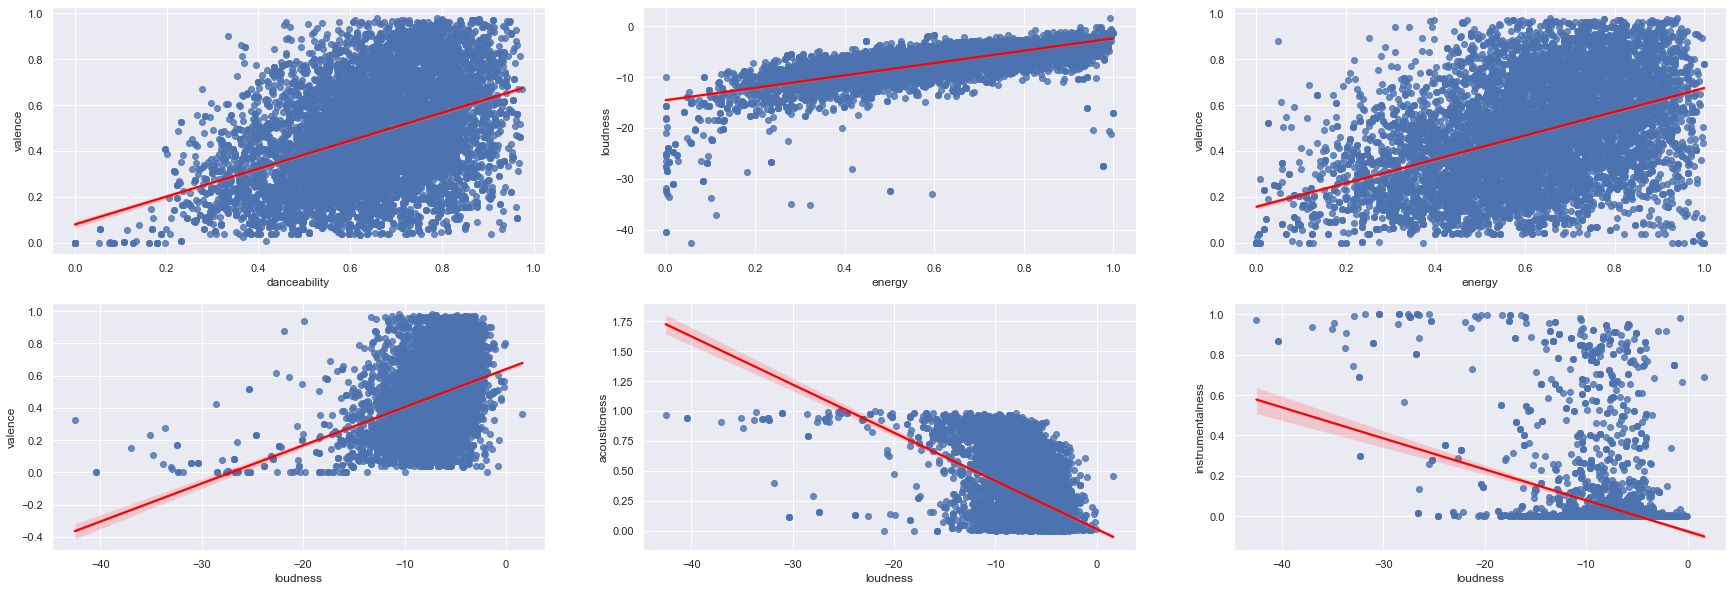

In [21]:
#producing scatterplots with associated regression lines for interesting interactions between variables
fig, ax = plt.subplots(2, 3, figsize=(30, 10))
sns.regplot(data=df, x='danceability', y='valence',ax=ax[0,0], line_kws={'color':'red'});
sns.regplot(data=df, x='energy', y='loudness', ax=ax[0,1], line_kws={'color':'red'});
sns.regplot(data=df, x='energy', y='valence' , ax=ax[0,2], line_kws={'color':'red'});
sns.regplot(data=df, x='loudness', y='valence' , ax=ax[1,0], line_kws={'color':'red'});
sns.regplot(data=df, x='loudness', y='acousticness' , ax=ax[1,1], line_kws={'color':'red'});
sns.regplot(data=df, x='loudness', y='instrumentalness' , ax=ax[1,2], line_kws={'color':'red'});

The plots above display the scatterplot between two quantitative variables and generally show the relation between the two. The overlay of the regression line on top of these plots simply seeks to provide additional insight into the strength of the relation between the two variables and provides some additional qualitative insight. While further analysis could seek to dive further into the model fit of these particular linear regressions, given that this course focused on the visualizing aspect of these models we focus instead on the trends which these lines display rather than their quantitative output. 

Based on the plots above, we can deduce the following insights:
- Loudness is a quantitative measure of music that seems to prove quite insightful in terms of displaying relations between certain attributes.
    - Based on the top middle plot, we can claim that energy and loudness seem to be strongly positively correlated. As energy increases, loudness tends to increase as well. This intuitively makes sense, given that based on contextual knowledge we know that loud songs can often tend to have quite an energetic feel to them. Additionally, the Spotify definition of energy seems to take loudness into account as well - further adding to the intuitive reasoning behind this strong correlation.
    - On the other hand, based on the bottom middle plot, it seems as though acousticness and loudness are negatively correlated. As loudness increases, acousticness seems to decrease and inversely. Intuitively, this also seems reasonable given that songs that are highly acoustic may be quite reliant on acoustic instruments that tend to be less inherently loud. 
- Valence, the perceived positiveness of a song, seems to have a positive relationship with both energy and danceability as seen in the top left and top right plots. While valence measures seem to have quite a wide distribution, as also seen in the data exploration section, we can see that songs with higher valence tend to have higher energy and danceability as well.

Visualizing the interactions between the different quantitative attributes in a different manner, we leveraged the heatmap down below which shows the correlations between all continuous variables in the dataframe. Looking at the top row of correlation measures, it seems as though the popularity scores of songs seem to be most strongly correlated with the valence attribute (a negative correlation) though overall this attribute does not show any particularly strong correlations. This suggests that the popularity scores in our dataframe are not particularly linked to any one musical attribute - information which is useful for our Research Question 3 wherein we seek to predict popularity based on the combination of all quantitative attributes.

Similar as in the scatterplots above, we also note that energy and loudness share the strongest correlation with one another at 0.71. Additionally, danceability and valence show a positive correlation with one another while energy and acousticness display a negative one at -0.59.

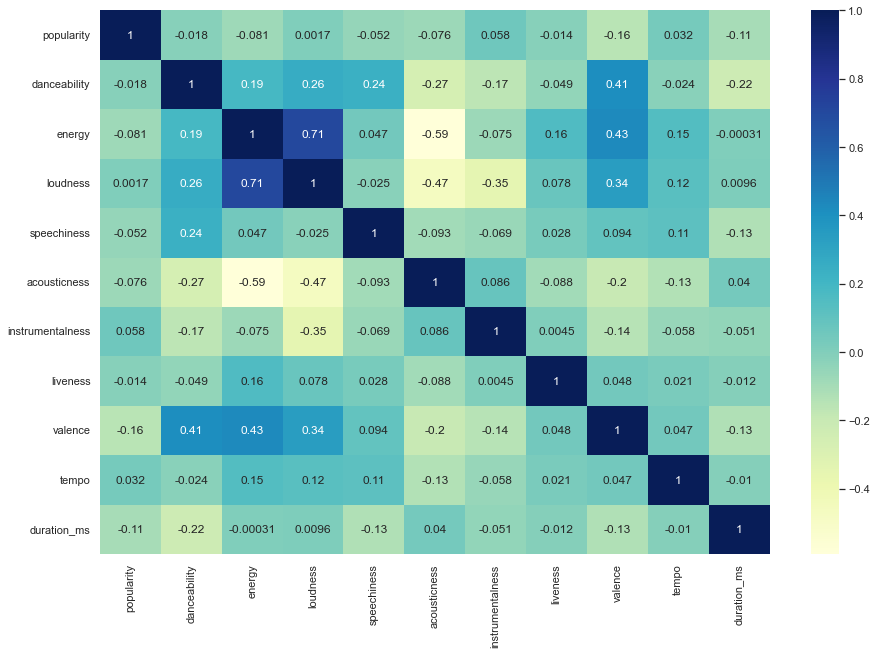

In [22]:
rcParams['figure.figsize'] = 15,10
sns.heatmap(df[continuous].corr(),annot=True,cmap='YlGnBu');

As noted above and visualized in the heatmap, the popularity metric seems to have the strongest correlation with valence - but overall does not seem to have any particularly strong relations with solely one of the various quantitative musical attributes and thus may be dependent on a variety of inputs. Despite this, in order to further gain insight into the distribution of the popularity metric, we visualized the metric across markets and years via a violin plot to display simultaneously the range of the metric and its distribution. 

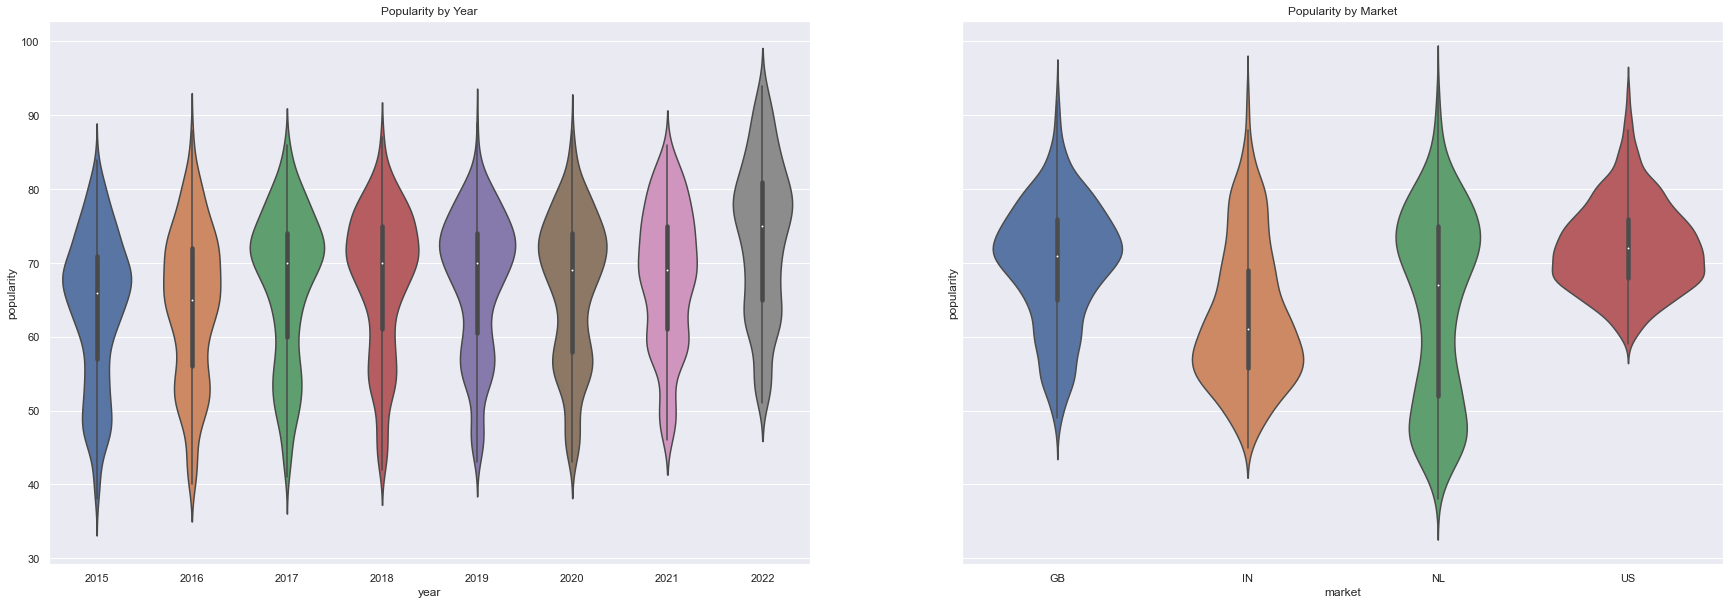

In [23]:
fig, ax=plt.subplots(1, 2, figsize=(30, 10), sharey=True)
sns.violinplot(data=df, y='popularity', x='year', ax=ax[0]).set(title='Popularity by Year')
sns.violinplot(data=df, y='popularity', x='market', ax=ax[1]).set(title='Popularity by Market');

Based on the above 'Popularity by Year' plot, we can note that the distribution of popularity scores has trended upwards throughout the years. For the year 2022, the distribution lies much higher than that of 2015. Based on the definition of popularity noted in the Data Description section above, this result seems to be relatively expected given that Spotify's definition of popularity does seem to take recency into account. 

Additionally, as visualized by the 'Popularity by Market' plot, the United States market contains a far denser distribution of popularity scores relative to the other markets. As seen, the United States popularity scores seem to be quite clustered around the 70 score, with scores rarely falling below the 60 mark. Given that the United States tends to play a large role in the music industry, it seems intuititive that songs from this market tend to be ranked with a higher popularity score. Additionally, it should be noted that The Netherlands contains a very wide distribution of popularity scores, with one dense area occuring around the 75 score and another around the lower 50 score. Given that The Netherlands is quite a small country, it can be imagined that those songs ranked with lower popularity scores are ones native to the country and thus record less overall plays (given the size of the nation) which draws down their overall popularity score. 

### B. *Research Question 2: How have the key attributes of popular music shifted over time and how does this relate to the well-being of certain countries at those points in time?* <a class="anchor" id="q2"></a>

For our second research question, we sought to leverage both our primary data source of Spotify music data and our secondary data source which includes both GDP per Capita and Happiness Scores for our relevant countries and years. While the analysis below compares both sources directly, it should be noted that this provides insight into the correlations between the different attributes but does not imply causation. However, the insights below could provide direction for future research regarding the relationships between the metrics.

In order to assess which musical attributes should be used for this comparison, we first provide pivot tables of the mean values of each musical attribute across years and markets. Note that this pivot table was split up into three segments, mainly for ease of use and to avoid scrolling across the metrics. 

In [24]:
variables_q2_1 = ['year','market', 'popularity', 'danceability', 'energy', 'loudness']
variables_q2_2 = ['year','market', 'instrumentalness', 'liveness','speechiness', 'acousticness'] 
variables_q2_3 = ['year','market',  'valence', 'tempo', 'duration_ms', 'time_signature', 'key', 'mode']

df_q1 = df[variables_q2_1][(df[variables_q2_1]['year']==2020)|(df[variables_q2_1]['year']==2019)|(df[variables_q2_1]['year']==2018)|(df[variables_q2_1]['year']==2017)|(df[variables_q2_1]['year']==2016)]
df_q1.pivot_table(index='market', columns='year', aggfunc='mean')

danceability                                            energy  \
year           2016      2017      2018      2019      2020      2016   
market                                                                  
GB         0.615132  0.623327  0.653834  0.632486  0.658149  0.598581   
IN         0.591623  0.628237  0.624581  0.628633  0.659310  0.634144   
NL         0.651486  0.651700  0.664439  0.660061  0.669869  0.617884   
US         0.626314  0.651617  0.671321  0.644227  0.675265  0.587116   

                                                loudness                      \
year        2017      2018      2019      2020      2016      2017      2018   
market                                                                         
GB      0.602217  0.600697  0.575873  0.605623 -7.240983 -7.570537 -7.059380   
IN      0.633755  0.625622  0.634610  0.609724 -7.103003 -6.495820 -6.544493   
NL      0.604456  0.600877  0.603161  0.602178 -7.130891 -7.014077 -7.070561   
US      0.567138  0.581796  0.555933  0.595221 -7.155517 -7.581793 -6.980997   

                           popularity                                   \
year        2019      2020       2016       2017       2018       2019   
market                                                                   
GB     -7.707179 -7.370839  67.155932  69.816327  70.081356  70.155405   
IN     -6.428798 -7.014830  59.448630  62.155932  63.702703  62.929293   
NL     -7.152681 -7.326624  61.870748  64.734007  65.091837  64.623729   
US     -7.665398 -7.327567  68.932432  71.680000  71.993311  72.354515   

                   
year         2020  
market             
GB      69.520548  
IN      62.289116  
NL      62.355932  
US      72.221843

In [25]:
df_q2 = df[variables_q2_2][(df[variables_q2_2]['year']==2020)|(df[variables_q2_2]['year']==2019)|(df[variables_q2_2]['year']==2018)|(df[variables_q2_2]['year']==2017)|(df[variables_q2_2]['year']==2016)]
df_q2.pivot_table(index='market', columns='year', aggfunc='mean')

acousticness                                         instrumentalness  \
year           2016      2017      2018      2019      2020             2016   
market                                                                         
GB         0.250078  0.272043  0.270054  0.332228  0.266111         0.032413   
IN         0.383939  0.350927  0.370291  0.365201  0.369722         0.010613   
NL         0.268906  0.293660  0.308255  0.337656  0.303546         0.020175   
US         0.262178  0.286555  0.275716  0.310803  0.265935         0.020076   

                                                liveness                      \
year        2017      2018      2019      2020      2016      2017      2018   
market                                                                         
GB      0.067785  0.041787  0.051605  0.029432  0.168242  0.166070  0.173162   
IN      0.022823  0.011526  0.007965  0.011123  0.183495  0.165968  0.178746   
NL      0.045938  0.030020  0.037710  0.026212  0.158154  0.157276  0.173762   
US      0.045104  0.025210  0.049306  0.033520  0.173205  0.168941  0.185189   

                           speechiness                                          
year        2019      2020        2016      2017      2018      2019      2020  
market                                                                          
GB      0.158047  0.175091    0.098277  0.111998  0.119768  0.118434  0.135839  
IN      0.165277  0.165989    0.070524  0.071971  0.078008  0.086055  0.097828  
NL      0.160928  0.165765    0.104489  0.114380  0.124903  0.127237  0.126638  
US      0.167316  0.171460    0.098152  0.124975  0.130666  0.116534  0.128990

In [26]:
df_q3 = df[variables_q2_3][(df[variables_q2_3]['year']==2020)|(df[variables_q2_3]['year']==2019)|(df[variables_q2_3]['year']==2018)|(df[variables_q2_3]['year']==2017)|(df[variables_q2_3]['year']==2016)]
df_q3.pivot_table(index='market', columns='year', aggfunc='mean')

duration_ms                                               \
year             2016           2017           2018           2019   
market                                                               
GB      213260.911864  214068.224490  199133.054237  199677.060811   
IN      259252.777397  235264.535593  220110.952703  219347.824916   
NL      208767.326531  203568.757576  196742.333333  191112.535593   
US      217797.608108  205308.583333  196284.816054  195822.622074   

                            tempo                                      \
year             2020        2016        2017        2018        2019   
market                                                                  
GB      190540.431507  121.951210  118.178541  121.338529  118.615057   
IN      210795.367347  117.623192  116.522664  118.543787  118.591640   
NL      186842.010169  119.411650  117.272646  119.004980  118.349854   
US      187036.610922  121.276601  117.532493  123.345415  120.486946   

                     valence                                          
year          2020      2016      2017      2018      2019      2020  
market                                                                
GB      120.307836  0.444857  0.437901  0.442159  0.450704  0.471395  
IN      114.156126  0.511661  0.497031  0.478831  0.499439  0.478788  
NL      116.721732  0.494893  0.472225  0.450186  0.487989  0.490611  
US      122.409048  0.427991  0.434575  0.417266  0.451723  0.461031

Based on the pivot tables above and our contextual knowledge, we chose to focus on the following three variables to provide us with insight into musical attributes' relation to Happiness and GDP per Capita: 

1. *Valence vs. Happiness Index*: As known based on the definition of valence in the Data Description section above, valence depicts the positiveness and mood conveyed by a particular track. For this reason, the attribute can prove particularly useful in relation to the Happiness Index; does a country and year's reported Happiness Index score align with the valence of music? Additionally, based on the third pivot table above we can see that valence scores across years and markets differ slightly from one another which will potentially provide us with meaningful comparisons. 
2. *Acousticness vs. Happiness Index*: As seen in the second pivot table, mean acousticness seems to differ quite drastically between markets and years thus making it a potential strong marker for time-based shifts that have occured. It is for this reason that we chose acousticness as an additional attribute to use for this analysis. When choosing which cultural metric to compare it to, we chose the Happiness Index given that based on our contextual knowledge we feel that acoustic music can tend to feel less positive than non-acoustic music. Thus, a view of acousticness vs. happiness could potentially provide us with insight into whether this relation does in fact exist.
3. *Duration vs. GDP per Capita*: When considering a musical attribute to compare GDP per Capita to we considered leveraging energy and duration in relation to productivity, as measured by GDP per Capita in this analysis. We based this choice on our own experience with using music to promote productivity; listening to songs that are both high-energy and of longer duration can inspire greater focus when working. Looking at the mean energy across years and markets in the first pivot table, however, we note that these metrics do not seem to change too much across the two dimensions and thus may not provide much meaningful insight in this regard. Pivoting to the duration of songs in the third pivot table, this metric does seem to shift over time and markets. 

*Valence vs. Happiness Index*

To compare valence versus the Happiness Index, we first transpose the mean valence scores over time and markets in order to more easily plot the two quantities over time. We leveraged lineplots for this analysis given their ability to clearly visualize time-based trends; for each part of the analysis, one plot will visualize the musical attribute and the other the cultural attribute.

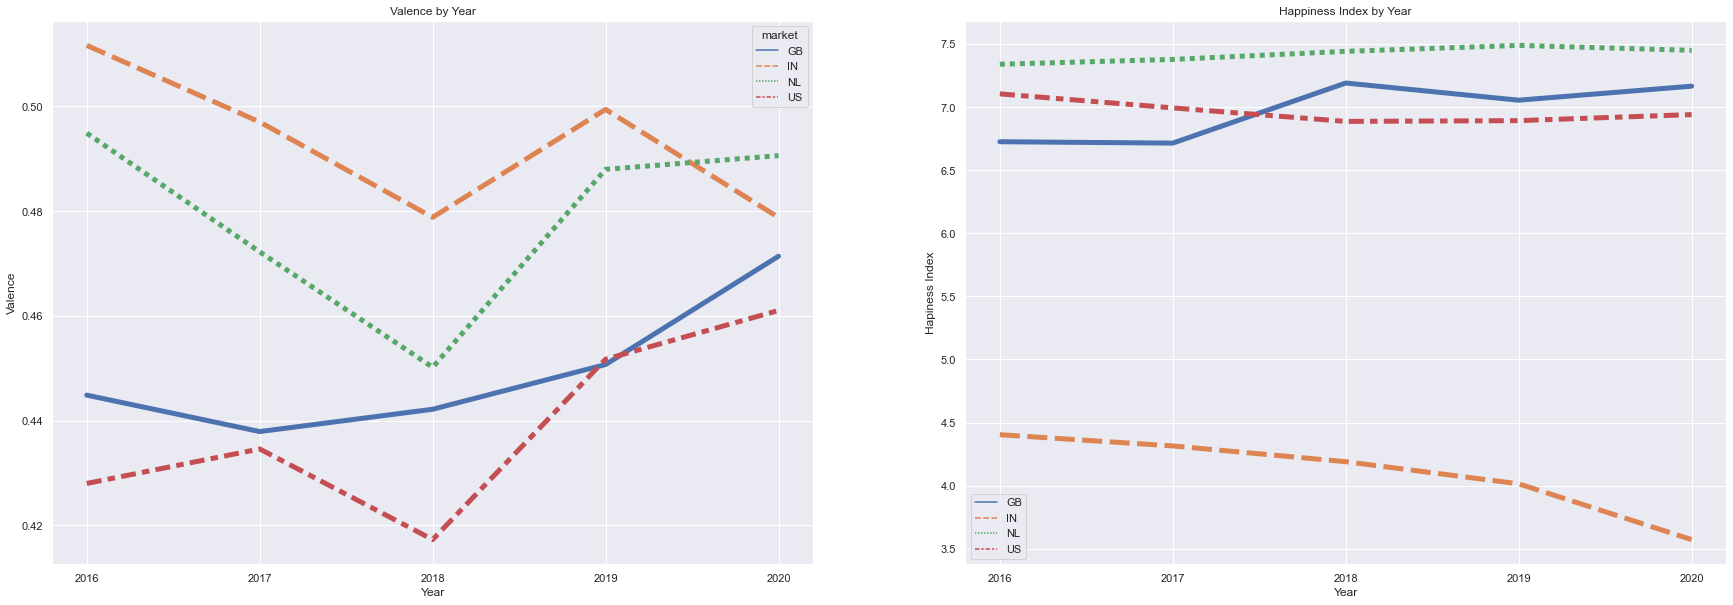

In [27]:
pivot_valence = df_q3.pivot_table(index='market', columns='year', aggfunc='mean')['valence'].transpose()

fig, ax = plt.subplots(1, 2, figsize=(30, 10))
sns.lineplot(data=pivot_valence, ax=ax[0], linewidth=5).set(title='Valence by Year');
sns.lineplot(data=Happiness_DF, ax=ax[1], linewidth=5).set(title='Happiness Index by Year');
ax[0].set(xlabel='Year', ylabel='Valence');
ax[0].set_xticks(range(2016,2021)); 
ax[0].set_xticklabels([2016,2017,2018,2019,2020]);
ax[1].set(xlabel='Year', ylabel='Hapiness Index');

When comparing year-over-year valence and Happiness Indices, India time trends stand out due to its uniquely downward trajectory. India's Happiness Index has consistently decreased since 2016, and this is also reflected by its musical valence (with the year 2019 providing a slight deviation from this trend). It should also be noted, that India's Happiness Index generally falls far below that of the other countries displayed in this analysis while its musical valence actually started in 2016 as ranking above other countries. As an additional insight, Great Britain displays a Happiness Index that has slowly increased or remained about steady year-over-year since 2016, with the musical valence also displaying this trend. 

Overall, visualizations suggest that a country's musical valence relative to other countries is not a direct reflection of its Happiness Index relative to those same nations. However, visualizations do suggest that shifts in a country's musical valence can reflect a country's overall shifts in happiness over time.

*Acousticness vs. Happiness Index*

To compare acousticness versus the Happiness Index, we again first transpose the mean acousticness scores over time and markets in order to more easily plot the two quantities over time. 

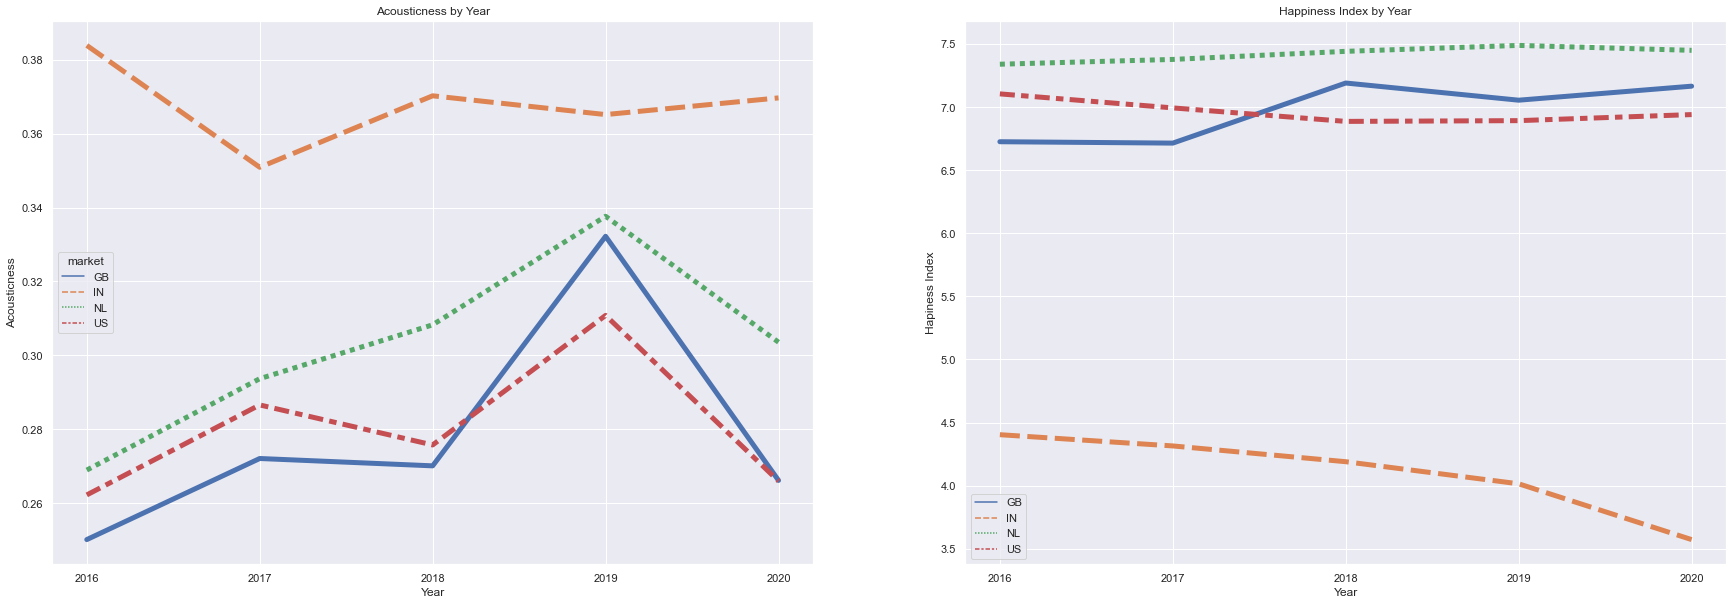

In [28]:
pivot_acousticness = df_q2.pivot_table(index='market', columns='year', aggfunc='mean')['acousticness'].transpose()

fig, ax = plt.subplots(1, 2, figsize=(30, 10))
sns.lineplot(data=pivot_acousticness, ax=ax[0], linewidth=5).set(title='Acousticness by Year');
sns.lineplot(data=Happiness_DF, ax=ax[1], linewidth=5).set(title='Happiness Index by Year');
ax[0].set(xlabel='Year', ylabel='Acousticness');
ax[0].set_xticks(range(2016,2021)); 
ax[0].set_xticklabels([2016,2017,2018,2019,2020]);
ax[1].set(xlabel='Year', ylabel='Hapiness Index');

Based on the visualizations above, we again note that India's Happiness Index is one that ranks below that of the other countries and also note that this is seen alongside a mean acousticness score that consistently ranks above that of the other nations and has held relatively consistent over time. Additionally, we note that the Netherlands, ranked as the highest in terms of Happiness Index year-over-year, displays a mean acousticness score that actually ranks above that of the United States and Great Britain year-over-year. This seems to disprove the assumption that a greater level of acoustics in music is aligned with lower overall happiness.

*Duration (ms) vs. GDP per Capita*

To compare the duration of songs versus the GDP per Capita, we transpose mean duration over time and markets in order to more easily plot the quantity relative to GDP per Capita over time. 

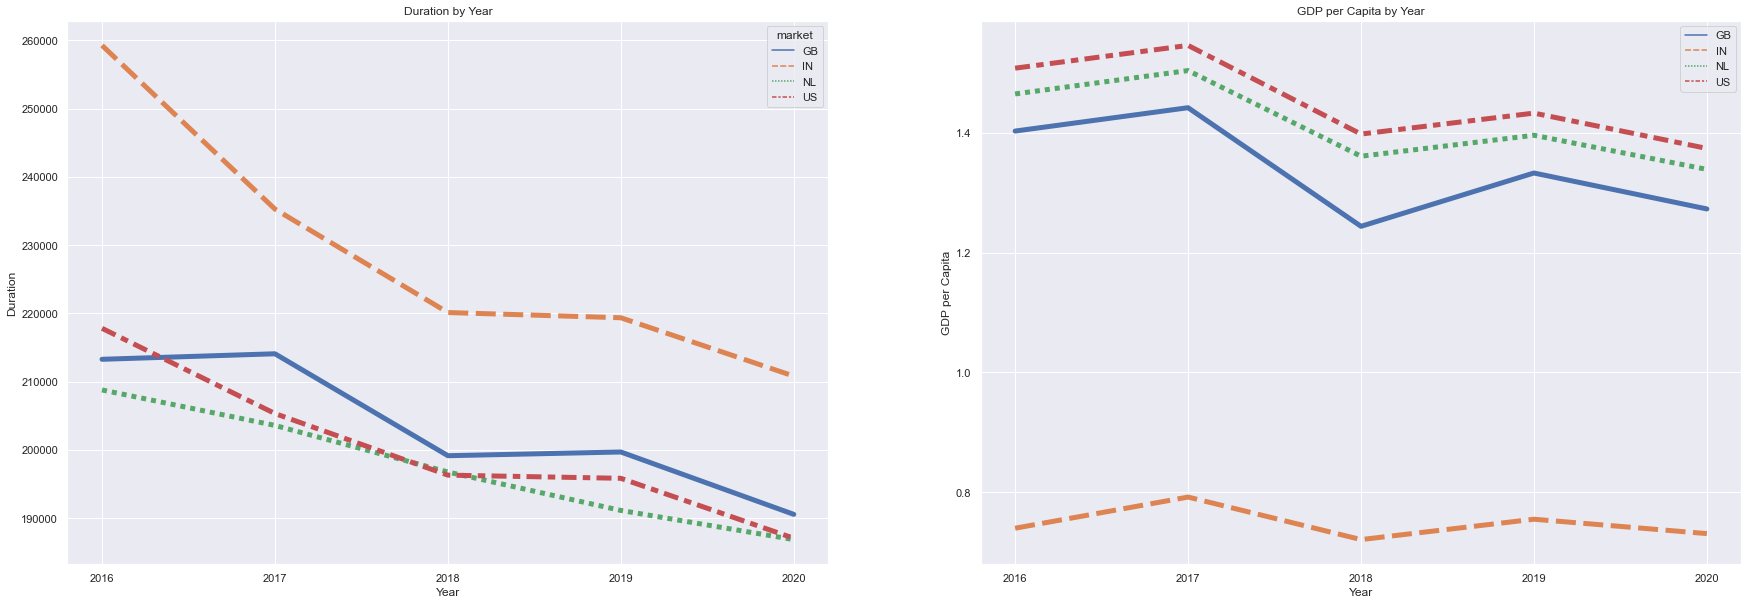

In [29]:
pivot_duration = df_q3.pivot_table(index='market', columns='year', aggfunc='mean')['duration_ms'].transpose()

fig, ax = plt.subplots(1, 2, figsize=(30, 10))
sns.lineplot(data=pivot_duration, ax=ax[0], linewidth=5).set(title='Duration by Year');
sns.lineplot(data=GDP_DF, ax=ax[1], linewidth=5).set(title='GDP per Capita by Year');
ax[0].set(xlabel='Year', ylabel='Duration');
ax[0].set_xticks(range(2016,2021)); 
ax[0].set_xticklabels([2016,2017,2018,2019,2020]);
ax[1].set(xlabel='Year', ylabel='GDP per Capita');

Based on visualizations above and earlier on for this research question, it should be noted that the India market generally tends to display a trend that is quite separated from the trends of other markets. With this knowledge, we note that the mean duration of songs has generally decreased over time across all markets while the GDP per Capita has also overall shown a slight decrease from 2016 to 2020 for all markets. Our initial assumption that longer duration of music could enhance productivity which would be visualized by GDP per Capital output does not hold true, but for  Great Britain, Netherlands, and United States markets we see decreasing durations year over year alongside decreasing GDP per Capita year over year. India, on this other hand, also displays decreasing duration of music but did not seem to show as significant of a decrease in its GDP per Capita. 

Overall, we conclude that the duration and valence musical attributes show stronger relations to their respective metrics of well-being compared to the acousticness attribute. Additionally, it should be noted that India as a market and country tends to continuously display trends that differ significantly from those of the other markets/countries considered in this analysis and thus could provide an area for further explanation. It should be noted that while musical attributes can provide additional insight into the wellbeing of countries as reported by the Happiness Index and GDP per Capita, there are a multitude of other factors which can contribute more significantly to these shifts as mentioned earlier.  

### C. *Research Question 3: Can music be grouped based on shared quantitative attributes, to provide insight into shared attributes and how does this relate to the genre attribute? Based on these attributes, can a song be predicted to be Popular or Not Popular?* <a class="anchor" id="q3"></a>

For this question, we sought to identify and understand the groupings of music that exist within our Spotify dataset and whether these groupings align with the concept of genre. We initially start by leveraging the K-Means clustering algorithm to identify clusters and use the t-SNE dimensionality reduction method to assist in this process. Following our analysis of the clusters produced, we then sought to leverage a variety of classifiers to predict whether or not a song is to be popular based on its quantitative attributes. The combination of these methods seeks to provide greater insight both into the groupings of music, and how these attributes leveraged in the groupings determine the Spotify-reported popularity of the song. 

*Clustering of Music*

In [30]:
#creating a df removing any duplicates that exist across multiple years and markets, focusing on their numerical attrib
df_no_duplicates = df[-df['track_name'].duplicated()]

Next, we chose the set of variables noted below to be used in our clustering methodology - only maintaining those numerical and continuous variables. We then standardize the dataframe, to ensure all numerical features are fit on the same scale. 

In [31]:
variables_clustering = ['popularity', 'danceability','energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
df_clustering = df_no_duplicates[variables_clustering]

In [32]:
df_clustering_scaled = pd.DataFrame(StandardScaler().fit(df_clustering).transform(df_clustering), columns=df_clustering.columns)
df_clustering_scaled.head()

,popularity,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2.926790,-0.024818,0.570603,0.419390,-0.688322,-0.914174,0.997834,-0.090993,-0.259036,-1.029887,-0.917082
1,3.026928,0.430636,0.006199,0.341013,-0.568254,0.390777,-0.224877,-0.701400,-1.391136,-0.730547,0.238496
2,2.726515,-0.557249,-0.516397,-0.684652,1.197559,-0.928565,-0.224863,1.411786,-0.285364,1.114218,0.543581
3,2.426101,-0.781769,-0.066965,0.557703,1.332974,-0.562661,-0.224860,0.164635,0.013019,-0.106535,-0.425936
4,2.426101,-1.038362,-0.385748,-0.248813,-0.701864,-0.874957,-0.190583,-0.840833,-1.976933,1.015195,-1.431075


As mentioned, this clustering analysis will leverage the K-Means methodology which will seek to identify similar songs and distance groupings of similar songs as far from one another as possible. We chose to leverage a dimensional reduction method prior to leveraging K-Means for visualization purposes.

As described during lectures, dimensionality reduction aims to transform higher dimensional datasets to lower dimensions while preserving the data's structure but to assist in its visualization - in this case we chose to reduce to 3 dimensions to be able to visualize the clusters later. Knowing that there are many different numerical attributes that may contribute to a song's grouping, we leveraged the t-SNE methodology here; this method seeks to convert "similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probability of the low-dimensional embedding and the high-dimensional data"("Sklearn.manifold.TSNE").

Note, that the dimensionality reduction and clustering methodology displayed down below leveraged this reference article which employed similar methodology to cluster employee level data. (Mysiak, 2020) The perplexity input to the function was determined based on a comparison between visualizations at different values, in addition to the findings that a higher perplexity should be used for larger datasets (Oskolkov, 2019). The perplexity input of 80 seemed to output the clearest clusters and was thus used going forward. 

In [33]:
random.seed(1)
tsne = TSNE(n_components=3, perplexity=60, n_iter=5000, learning_rate='auto', init='random') 
tsne_scale_results = tsne.fit_transform(df_clustering_scaled)
tsne_res_df_scale = pd.DataFrame(tsne_scale_results, columns=['tSNE1', 'tSNE2', 'tSNE3'])

Following the completion of t-SNE above and in order to leverage this output in our K-Means clustering, we must first decide the number of clusters we believe best fits the data. In order to deduce the preferred number of clusters, we leveraged an elbow plot. The elbow plot runs the K-Means algorithm for multiple number of clusters and then visualizes the sum of squared distances at each k (number of clusters) (Mysiak, 2020). 

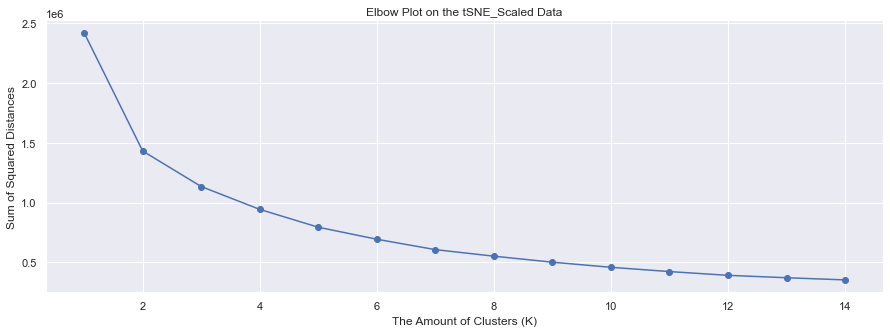

In [34]:
sse = []
ls_k = range(1, 15)
for k in ls_k:
    kmean = KMeans(n_clusters=k)
    kmean.fit(tsne_res_df_scale)
    sse.append(kmean.inertia_)
    
plt.figure(figsize=(15,5));
plt.plot(range(1,15), sse, marker='o')
plt.title('Elbow Plot on the tSNE_Scaled Data');
plt.xlabel('The Amount of Clusters (K)');
plt.ylabel('Sum of Squared Distances');

Based on the plot above, we decided to move ahead with 4 clusters for the K-Means clustering given that this value aligns with a relatively low sum of squared distances. At a greater number of clusters, this sum of squared distances seems to reduce less and thus may not add more value. 

Below, the K-Means clustering is ran with the number of clusters set to 4. Note that the number of initial iterations (20) and maximum iterations (300) are set in order manage the picking of the initial centroids for the clusters (Mysiak, 2020).

Following the fitting of the clustering algorithm, a 'Silhoutte Score' is output which indicates the tightness of clusters and their separation from one another - ideally we would want this to be as close as possible to 1, in this case it seems to be about 0.30.

In [44]:
kmeans_kwargs = {
    'init': 'k-means++',
    'n_init': 20,
    'max_iter': 300,
    'random_state': 42,
}

kmeans_tsne = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans_tsne.fit(tsne_res_df_scale)
print(f"The seperatability between clusters is indicated by the Silhouette Score: {silhouette_score(tsne_res_df_scale, kmeans_tsne.labels_, metric='euclidean')}.")
labels_tsne = kmeans_tsne.labels_
clusters_tsne = pd.concat([tsne_res_df_scale, pd.DataFrame({'tsne_clusters':labels_tsne})], axis=1)

The seperatability between clusters is indicated by the Silhouette Score: 0.2970745861530304.


Finally, visualizing songs based on their clusters below via plotly:

In [45]:
#note: plotly visualiziation will not render in github, must be visualized in Jupyter Notebook
layout_set = go.Layout(scene = dict(xaxis = dict(title  = 'tSNE1'),yaxis = dict(title  = 'tSNE2'),zaxis = dict(title  = 'tSNE3')), height = 1500,width = 1500)
fig = go.Figure(data = [go.Scatter3d(x=clusters_tsne.iloc[:,0], y=clusters_tsne.iloc[:,1], z=clusters_tsne.iloc[:,2], mode='markers',marker=dict(color = labels_tsne, colorscale='magma', size = 10, line = dict(color = 'green', width = 7)))], layout = layout_set)
fig.show()

Based on the visual representation of these clusters, we can tell that they seem to be decently separated from one another and don't overlap. Next, we must gain insight into how each of these clusters differ from one another and which quantitative attributes seem to play a large role in determining these clusters. In order to gain this insight, we plot the numerical attributes we found differed most across clusters below and provide mean and standard deviations for the metrics per cluster.

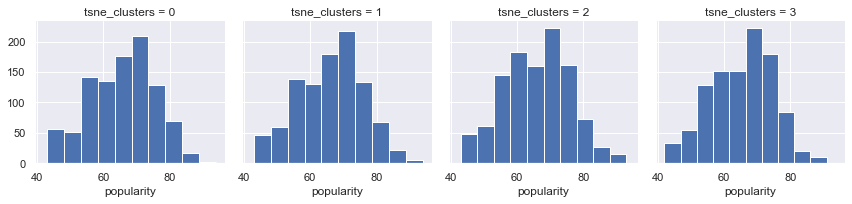

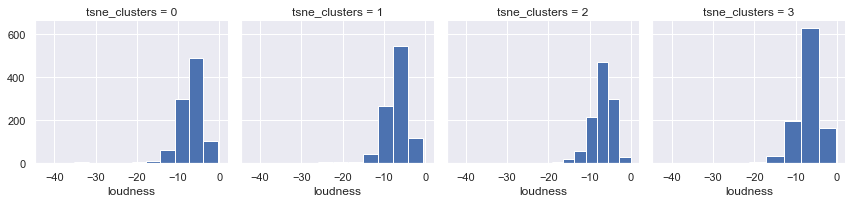

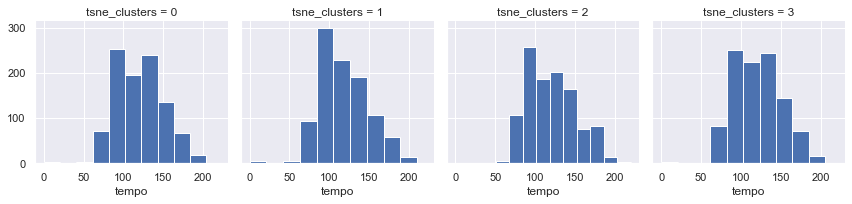

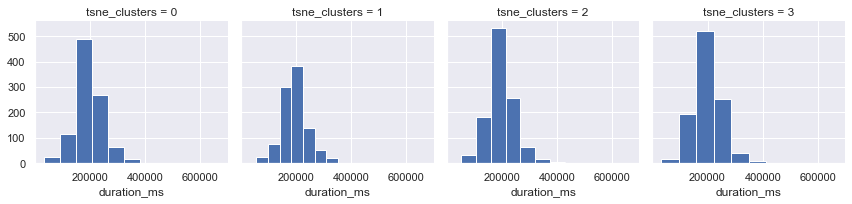

In [47]:
cluster_tsne_profile = pd.merge(df_clustering, clusters_tsne['tsne_clusters'], left_index=True, right_index=True )
relevant = ['popularity', 'loudness', 'duration_ms', 'tempo']

for variable in cluster_tsne_profile:
    if variable in relevant:
        sns.FacetGrid(cluster_tsne_profile, col='tsne_clusters').map(plt.hist, variable)

In [48]:
cluster_tsne_profile.pivot_table(index='tsne_clusters', aggfunc=['mean'])

mean                                        \
              acousticness danceability    duration_ms    energy   
tsne_clusters                                                      
0                 0.298473     0.664691  196766.107614  0.624369   
1                 0.313624     0.657710  196908.289289  0.607754   
2                 0.309021     0.657273  197980.405109  0.615531   
3                 0.302365     0.663941  199863.941120  0.618687   

                                                                           \
              instrumentalness  liveness  loudness popularity speechiness   
tsne_clusters                                                               
0                     0.033462  0.164982 -7.065040  65.701523    0.118140   
1                     0.034547  0.164959 -7.266643  66.151151    0.118341   
2                     0.025664  0.176380 -7.041359  65.456204    0.120077   
3                     0.025846  0.176148 -7.038447  65.194981    0.119942   

                                     
                    tempo   valence  
tsne_clusters                        
0              120.105010  0.503651  
1              118.826089  0.478299  
2              120.582438  0.488594  
3              121.187115  0.495397

In [49]:
cluster_tsne_profile.pivot_table(index='tsne_clusters', aggfunc=['std'])

std                                       \
              acousticness danceability   duration_ms    energy   
tsne_clusters                                                     
0                 0.272336     0.154028  55411.489746  0.185184   
1                 0.282578     0.157648  50104.752213  0.192370   
2                 0.269018     0.145250  51045.630766  0.177439   
3                 0.279942     0.153312  52857.250665  0.191078   

                                                                           \
              instrumentalness  liveness  loudness popularity speechiness   
tsne_clusters                                                               
0                     0.144760  0.116719  3.329874   9.748475    0.113158   
1                     0.145552  0.117227  3.514634   9.576303    0.115751   
2                     0.126960  0.130708  2.803334   9.935127    0.115914   
3                     0.126426  0.132373  3.146832   9.657448    0.115721   

                                    
                   tempo   valence  
tsne_clusters                       
0              29.863166  0.228861  
1              30.163407  0.224561  
2              30.194807  0.226401  
3              29.666304  0.222082

Comparing between the distributions and mean values of the attributes across each cluster, a few insights can be drawn out:

- Popularity: Popularity differs slightly between clusters, with cluster 1 displaying the highest mean popularity score and cluster 3 the lowest. Standard deviation for the score seems to hold about equal across the different clusters. 
- Loudness: Mean values for loudness seemed to differ; it seems as though cluster 1 songs tend to be less loud and cluster 3 songs are louder. 
- Duration: As seen by the distributions of duration across clusters, it seems as though cluster 3 songs are generally longer. Overall, cluster 0 and 1 songs tend to be shorter though the standard deviation of cluster 0's duration is larger than that of 1.
- Tempo: The tempo of songs in cluster 3 tend to be higher relative to other clusters, as visualized by the distribution and mean values. In conjunction with loudness, this seems to imply that cluster 3 songs tend to be both higher-tempo and louder relative to songs in other clusters.

Given the clustering insights above, we then wanted to uncover whether these clusterings were at all related to artist genre - do any of the clusters link to a certain particular genre? In order to uncover this, we looped through the artist genre column in our original data set and had to do some additional data cleaning given this columns formatting and the ability for an artist to fit into multiple genres. Note, when looping over all genre values associated with an artist - it may be that a particular song doesn't necessarily align with all genre values associated with the artist. However, we expect that each cluster would be similarly affected by this dynamic. Given that the pop genre tended to be prevalent across each of the clusters, we chose to instead focus on the degree of pop prevalence across genres. The proportion of pop in each cluster will provide us with insight into how reliant each cluster is on this genre and whether any of the genres stray from this and focus more on different genres. 

In [50]:
fractions_dic = {}
for class_tsne in [0,1,2,3]:    
    #Create correct format for genre 
    res = []
    genres = df.iloc[cluster_tsne_profile[cluster_tsne_profile['tsne_clusters']==class_tsne].index]['artist_genre']
    for ls in genres:
        ls = ls[1:len(ls)-1]
        temp = ls.split(',')
        for ele in temp:
            ele = ele.strip()
            ele = ele[1:len(ele)-1]
            res.append(ele)
    res_dic = {}
    for ele in res:
        if ele not in res_dic:
            res_dic[ele] = 1
        else:
            res_dic[ele] += 1
      
    fractions_dic[class_tsne] = res_dic['pop']/len(res_dic)

print(fractions_dic)

{0: 0.496, 1: 0.5105263157894737, 2: 0.49870801033591733, 3: 0.4312169312169312}


As seen by the output above, we note that while the pop genre is certainly prevalent in each of the clusters - it is far more prevalent in cluster 1 for which about 51% of the music is identified as pop. Cluster 3 seems to return the least amount of pop genre, at 43%. Based on the attributes of cluster 1 (as seen by the pivot table above), this seems to imply that pop songs generally have a higher Spotify popularity score, tend to be less loud, and tend to have lower tempo. On the opposite end, cluster 3 returns the lowest level of pop-genre and also shows lower mean Spotify popularity scores, higher loudness, higher tempo - and also returns a mean duration that exceeds that of other clusters.

*Prediction of Song Popularity*

Next, we sought to determine whether a song's popularity could be predicted based on its numerical attributes. As we saw in the clustering analysis above, certain attributes of songs do seem to differ slightly between various created clusters - with this difference also being shown by the prevalence of the pop genre between clusters. Using the same numerical attributes as used for the clustering analysis above, we leveraged multiple classification methods and compared these in order to deduce which one might be most suited to differentiate between the binary classes of popular vs. non-popular music. 

First, we create a the binary categorization of Popular and Non-Popular music using the 'popularity' attribute. The "Popular" category ranges from the 50th percentile of popularity (score of 65) to the maximum score, while the "Not Popular" score ranges from the minimum value to the 50th percentile.

In [51]:
#create binary classes of data
data = [["Popular (P)", f"[{df_no_duplicates['popularity'].quantile(0.5)}, {df_no_duplicates['popularity'].max()}]"],  
        ["Not Popular (NP)", f"[{df_no_duplicates['popularity'].min()},{df_no_duplicates['popularity'].quantile(0.5)}]"]]
  
#define header names
col_names = ["Classification", "Popularity Interval"]

#display table
print(tabulate(data, headers=col_names))

Classification    Popularity Interval
----------------  ---------------------
Popular (P)       [65.0, 94]
Not Popular (NP)  [38,65.0]


Following this, we then prepare the dataset by assigning data from the de-duplicated Spotify dataframe to Popular vs Non-Popular dataframes based on the popularity score ranges deduced above. Columns that are no longer relevant to the analysis are dropped for clarity, and a value of 1 is assigned to songs determined to be popular and 0 to those determined to be non-popular.

In [52]:
#preparing dataset
df_p = df_no_duplicates[(65<df_no_duplicates['popularity']) & (df_no_duplicates['popularity']<94)]
df_np = df_no_duplicates[(38<df_no_duplicates['popularity']) & (df_no_duplicates['popularity']<65)] 

df_p=df_p.assign(Popularity_class = 'P')
df_np=df_np.assign(Popularity_class = 'NP')

df_pop=pd.concat([df_p,df_np])

df_pop.drop(['popularity','year','market','artist_name','track_name','artist_genre'],axis=1,inplace=True)

label=[]

for pop in df_pop['Popularity_class']:
    if(pop=='P'):
        label.append(1)
    else:
        label.append(0)

df_pop.drop('Popularity_class',axis=1,inplace=True)
df_pop['Popularity_class']=label

X=df_pop.iloc[:,:-1]
y=df_pop.iloc[:,-1]

Note that above, the variable 'X' is set to contain all quantitative features within the dataframe while 'y' is assigned to be solely the 1 vs. 0 popularity coding designed above. These variables are next used in the splitting and scaling process below, first standardizing features and then splitting the data set into training and testing segments.

In [53]:
# splitting and scaling
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.3)

Next, as was done during the course as well, a dictionary with each of the classifiers to be used during this analysis is created and are used  below when all classifiers are fit to the training data in a for loop. Following the fit of the model on the training data, the model is applied to the testing data and the binary classification produced is compared to the true popularity labels of the test set. When fitting  each of the models, performance on the model fit of each of the classifiers is gathered - namely accuracy, true positive rate and false positive rate - which will be used to compare performance.

In [54]:
# creating models
RANDOM_SEED = 1

classifiers = {"Logistic Regression": LogisticRegression(random_state=RANDOM_SEED),
"Linear SVM": SVC(kernel="linear", C=0.025, probability=True,random_state=RANDOM_SEED),
"Nearest Neighbour": KNeighborsClassifier(5),
"RBF SVM": SVC(probability=True, random_state=RANDOM_SEED),
"Random Forest": RandomForestClassifier(random_state=RANDOM_SEED),
"AdaBoost": AdaBoostClassifier(random_state=RANDOM_SEED)}

In [55]:
# determining performance
performance = {}

for name, classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    y_hat = classifier.predict(X_test)
    cm = confusion_matrix(y_test, y_hat)
    tn, fp, fn, tp = cm.ravel()
    accuracy = accuracy_score(y_test, y_hat)
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    performance[name] = [accuracy,tpr,fpr]

performance_df=pd.DataFrame(performance, index = ['Accuracy','TPR','FPR']).T
performance_df

,Accuracy,TPR,FPR
Logistic Regression,0.613176,0.550114,0.325167
Linear SVM,0.612613,0.545558,0.321826
Nearest Neighbour,0.573198,0.576310,0.429844
RBF SVM,0.628378,0.569476,0.314031
Random Forest,0.618806,0.570615,0.334076
AdaBoost,0.605293,0.562642,0.353007


Accuracy, defined as the proportion of correctly classified samples, is relatively similar between most of the classifiers. It does seem as though Nearest Neighbour performs slightly lower in terms of its accuracy (below 60%) - namely due to a higher false positive rate for the classifier. In order to gain more insight into the performance of each of the classifiers, however, we chose to also leverage an ROC curve which is able to more clearly visualize the trade-off that can occur between sensitivity and specificity. 

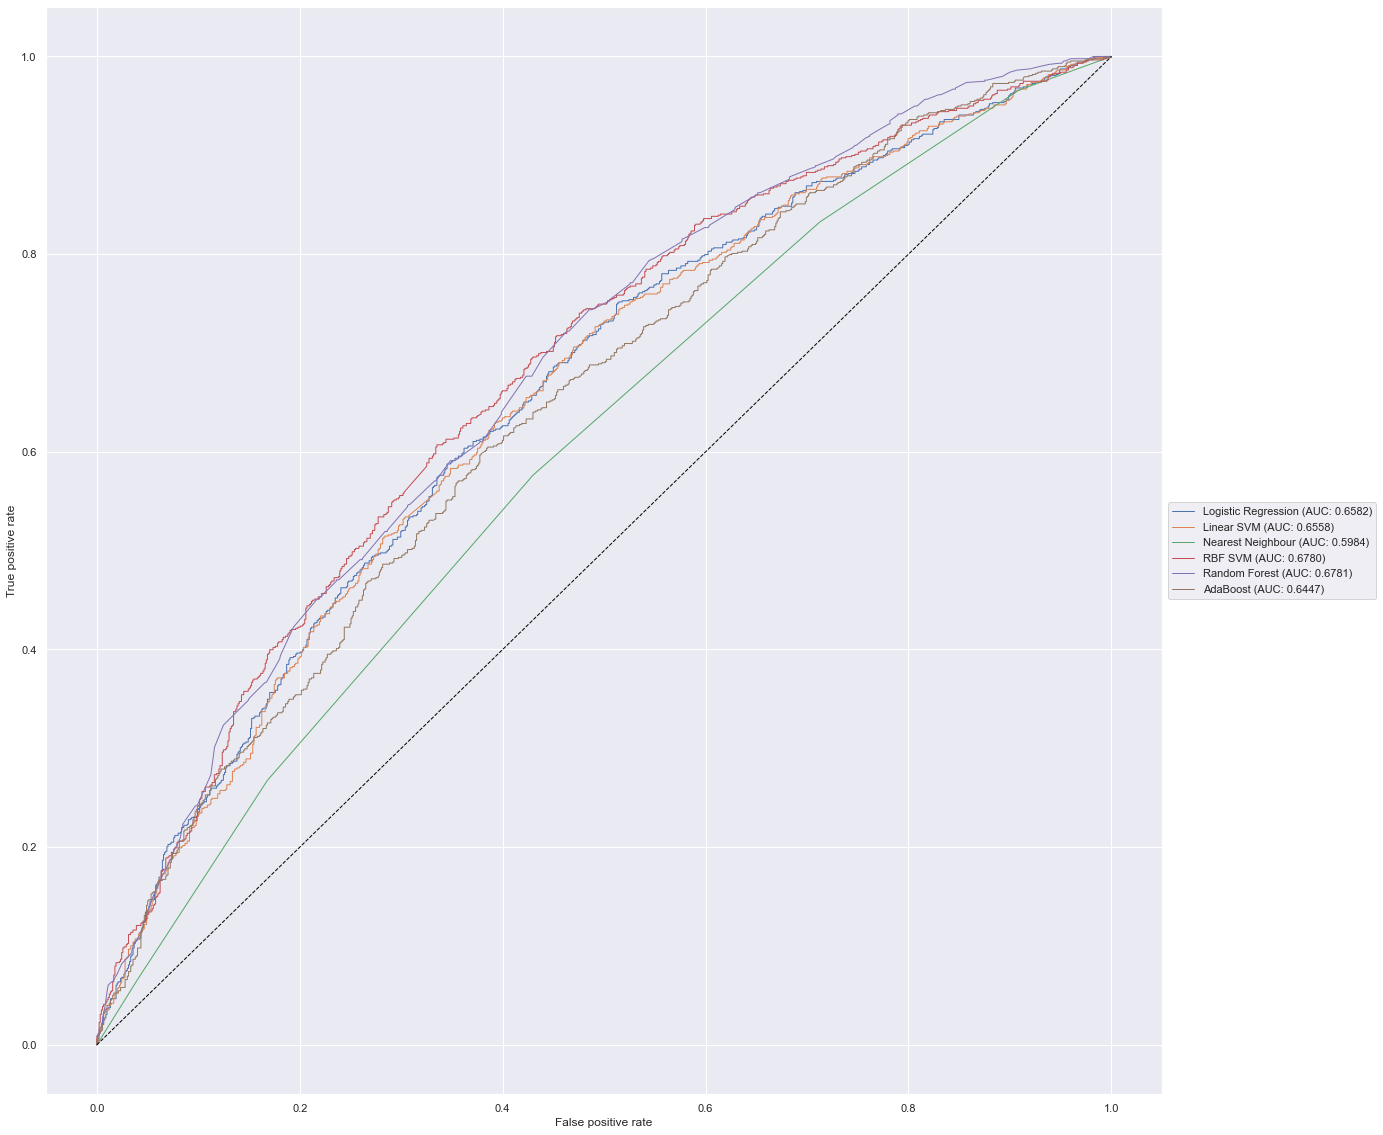

In [56]:
# ROC curve
plt.figure(figsize=(20, 20))

pred_prob = {}
for name, classifier in classifiers.items():
    classifier.fit(X_train,y_train)
    pred_prob[name] = classifier.predict_proba(X_test)[:,1]

for name in ['Logistic Regression', 'Linear SVM', 'Nearest Neighbour','RBF SVM','Random Forest','AdaBoost']:
    fpr, tpr, _ = roc_curve(y_test, pred_prob[name])
    plt.plot(fpr, tpr, lw=1, label=f'{name} (AUC: {auc(fpr, tpr):.4f})')
plt.plot([0, 1], [0, 1], color='black', lw=1,linestyle='--')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("False positive rate"); plt.ylabel("True positive rate");

As seen by the ROC curve above, each of the classifiers used performs greater than a random classifier would (as they each score above the line denoting 50% AUC). Additionally, we can once again claim that the Nearest Neighbour (green line) performs below that of the other classifiers with an AUC of 60%. Choosing the best classifier still remains difficult leveraging this plot, however it does seem as though the RBF SVM and Random Forest models may perform the best and as confirmed by the 68% AUC which ranks above that of the other classifiers.  

Using our dataset of Spotify music, we were able to predict the popularity of songs in a manner that outperforms that of a random classifier. In combination with the clustering analysis done above, this provides greater insight into the ways in which music across our years and markets differed from one another and the way in which these differences can be used to predict the binary popularity of the songs.

## 5. Discussion & Conclusion <a class="anchor" id="conclusion"></a>

This analysis sought to analyse Spotify musical attributes, in relation to each other and other country-level factors of well-being. Additionally, this analysis sought to dive further into how these attributes lead to various groupings of songs and whether attributes can be used to predict the popularity of a song. 

In our analysis, we first discovered that there do exist relations between various musical attributes and that the Spotify-based rank of popularity varies across years and markets. Additionally, comparing musical attributes against other markers of the well-being of a country (happiness and GDP) can produce interesting insights. While music certainly does not provide a full contextual picture for these markers, given that there are many aspects that influence them, music can be a way in which some of the effects of these markers manifest themselves. For example, happier countries do sometimes seem to listen to more positive music. 

Finally, clustering the quantitative dataset of music provides insight into the ways in which music is differentiated, especially alongside the pop genre. Taking this idea of differentiation one step further, it was concluded that predicting a binary Spotify popularity class based of attributes is possible and outperforms that of random classifiers. This suggests that popular music does in fact share attributes that contributes to its popularity. 

This analysis did suffer from several limitations, including the high reliance on the Spotify definitions of the attributes used. Given that the analysis leveraged an API, our group was entirely dependent on the outputs of this API and their sourcing. For example, an attribute such as popularity was entirely defined by Spotify using logic that we do not have complete insight into. Additionally, given API limitations, this analysis was limited to several years and markets. More markets would have provided a more representative data set to be used but would have exceeded API rate limits. 

In terms of next steps, studies on similar topics could look further into the correlations between musical attributes themselves and other markers to provide research into whether these relations can be seen as causal relationships. Moreover, additional research could seek to explore other markers of well-being that music could provide a reflection of. While this study focused on happiness (Happiness Index) and productivity (GDP per Capita) topics using different markers or different topics altogether could be explored using similar methodology. Additionally, next steps could include the use of the classification models created during this study and test their performance on songs outside of the scope of our initial dataset. Given that the entire, and thus also training, data set was formed of only four markets, performance of the classifiers outside of these markets should be tested further and used with caution. 

## 6. References <a class="anchor" id="references"></a>

Al-Beitawi, Z., Salehan, M., & Zhang, S. (2020). What makes a song trend? cluster analysis of musical attributes for spotify top trending songs. *Journal of Marketing Development and Competitiveness*, 14(3), 79-91. Retrieved from https://www.proquest.com/scholarly-journals/what-makes-song-trend-cluster-analysis-musical/docview/2444523984/se-2

Aslam, S. (n.d.) How to Add a Table of Contents in the Jupyter Notebook. Linuxhint. https://linuxhint.com/add-table-contents-jupyter-notebook/

*Developer Showcase.* (n.d.) Spotify for Developers. https://developer.spotify.com/community/showcase/

*GDP Per Capita Defined: Applications and Highest per Country* (2022, December 22).  Investopedia. https://www.investopedia.com/terms/p/per-capita-gdp.asp

Gelo, T. (2018, September 27). *Spotify Data Project Part 1 — from Data Retrieval to First Insights*. Medium. https://towardsdatascience.com/spotify-data-project-part-1-from-data-retrieval-to-first-insights-f5f819f8e1c3

*Get Track’s Audio Features.* (n.d.) Spotify for Developers. https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features

Gray, A. (2022, January 6) How Can Music Affect Your Mood and Reduce Stress? *PPLPRS.* https://pplprs.co.uk/health-wellbeing/music-reduce-stress/

Hughes, C. (2015, March 9). Understanding the Spotify Web API - Spotify Engineering . *Spotify Engineering*. https://engineering.atspotify.com/2015/03/understanding-spotify-web-api

Lin, A. L. (2020, October 20). *Faster, Louder, More Explicit: How Music Has Evolved Over the Years*. Medium. https://allrambles.medium.com/faster-louder-more-explicit-how-music-has-evolved-over-the-years-and-how-my-own-musical-taste-6fbc3cfc38ef

*Music Genome Project.* (2023, February 8). Wikipedia. https://en.wikipedia.org/wiki/Music_Genome_Project

Mysiak, K. (2020, July 14). *Explaining K-Means Clustering*. Medium. https://towardsdatascience.com/explaining-k-means-clustering-5298dc47bad6

Oskolkov, N. (2019, July 19). How to tune hyperparameters of tSNE. Medium. https://towardsdatascience.com/how-to-tune-hyperparameters-of-tsne-7c0596a18868

*Rate Limits.* (n.d.) Spotify for Developers. https://developer.spotify.com/documentation/web-api/guides/rate-limits/

Rentfrow, P. J., Goldberg, L. R., & Levitin, D. J. (2011). The structure of musical preferences: a five-factor model. *Journal of personality and social psychology*, 100(6), 1139–1157. https://doi.org/10.1037/a0022406

*Search for Item.* (n.d.) Spotify for Developers. https://developer.spotify.com/documentation/web-api/reference/#/operations/search

*Sklearn.manifold.TSNE.* (n.d.) Scikit Learn. https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE

*Songs should show the type of genre it is*. (2022, March 24) Spotify Community. https://community.spotify.com/t5/Live-Ideas/Songs-should-show-the-type-of-genre-it-is/idi-p/5358305

Spotify search ranking. (n.d.) Spotify for Artists. https://artists.spotify.com/help/article/spotify-search-ranking

*Welcome to Spotipy!* (n.d.) Spotipy Documentation. https://spotipy.readthedocs.io/en/2.22.1/

*World Happiness Report*. (2023, February 8). Wikipedia. https://en.wikipedia.org/wiki/World_Happiness_Report